## LSE Data Analytics Online Career Accelerator

# Course 3 Assignment: Predicting Future Outcomes

## Summary of the scenario:

A team of data analysts has been contracted by Turtle Games, a game manufacturer and retaliler with a global customer base. The company manufactures and sells its own products, along with sourcing and selling products manufactured by other companies. Its product range includes books, board games, video games, and toys. The company collects data from sales and customer reviews. Turtle Games has a business objective of improving overall sales performance by analysing and considering customer trends.  

To improve overall sales performance, Turtle Games has developed an initial set of questions. The questionsra:e   

- How do customers engage with and accumulate loyalty points?
- How can customers be segmented into groups, and which groups can be targeted by the marketing department? 
- How can text data (e.g. social data such as customer reviews) be used to inform marketing campaigns and make improvements to the business- ?
Can we use descriptive statistics to provide insights into the suitability of the loyalty points data to create predictive models (e.g. normal distribution, skewness, or kurtosis) stions.

### Summary of the Data Files:


-	turtle_reviews.csv – Details on customer gender, age, remuneration, spending score, loyalty points, education, language, platform, review and summary across products. Originally, the file had 11 columns and 2000 rows. 
-	metadata_turtle_games.txt – Details of the data set, data quality, and reference.


### Familiarising with Data:

To familiarise with the data, I imported the csv file into Jupyter notebook and using pandas, I read the file , sense checked the data using shape(), info() and describe() functions. I checked for missing and duplicate values. There were none. I removed the irrelevant, redundant columns ('language' and 'platform') from the data. Lastly, to reduce complexity, I changed columns names from 'renumeration' to 'salary', and 'spending_score (1-100)' to 'spending'.  I saved the edited file as 'clean_reviews.csv'.

# 1. Linear regression using Python

Turtle Games have a Customer Loyalty Points system where customers are able to accumulate loyalty points based on how much they spend. To optimise their sales, Turtle Games want to know if any of the factor(s), such as customer age, salary or spending score have any direct affect on them earning loyalty points. The first task was to use Linear Regression and goodness of fit metrics to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points. 

I followed the instructions below. Linear Regression is sensitive to outliers. Therefore, I performed outlier analysis using the IQR (Interquartile Range), upper and lower bounds methods on 'salary' and 'spending' columns to check for the presence of outliers. As it will be seen below that no outliers were detected.  


### Instructions

- Load and explore the data.
- Create a new DataFrame (e.g. reviews).
- Sense-check the DataFrame.
- Determine if there are any missing values in the DataFrame.
- Create a summary of the descriptive statistics.
- Remove redundant columns (language and platform).
- Change column headings to names that are easier to reference (e.g. renumeration and spending_score).
- Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
- Use linear regression and goodness of fit metrics to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
- Specify the independent and dependent variables.
- Create the OLS model.
- Extract the estimated parameters, standard errors, and predicted values.
- Generate the regression table based on the X coefficient and constant values.
- Plot the linear regression and add a regression line.
- Include your insights and observations.

## 1.1. Load and Explore the data

In [79]:
# Import necessary libraries.
# Creating the linear regression
import numpy as np
import pandas as pd
import pylab as py
import sklearn
import math

# Visualise the linear regression.
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from scipy import stats
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import the statsmodels.
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

# Import Warnings
import warnings  
warnings.filterwarnings('ignore')  

## 1.2. Sense check the data.

In [81]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# Validate if file has been imported successfully
print(reviews.shape)
print(reviews.columns)
print(reviews.dtypes)

# View the DataFrame.
reviews.head()

(2000, 11)
Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')
gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object


gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [82]:
# Check the metadata.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


## 1.3. Clean the data. 
 

In [84]:
# Check for missing values.
reviews_null = reviews[reviews.isna().any(axis=1)]


# Print to check if there are missing values.
reviews_null.shape

(0, 11)

In [85]:
# Check the number of duplicates.
print("Number of duplicate records in reviews:",reviews.duplicated().sum())

Number of duplicate records in reviews: 0


In [86]:
# Create a summary of the descriptive statistics.
reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

std values of 'loyalty_points' and 'products' are quite high suggesting that data points are quite further away from the mean. 

## 1.4. Remove redundant Columns

In [89]:
# Drop the 'language' and 'platform' columns which are unnecessary.
reviews.drop(columns=['language','platform'], inplace=True)

# View column names.
print(reviews)

      gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education  product                

## 1.5. Rename Columns.

In [91]:
# Print Columns names before renaming
reviews.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

In [92]:
# Rename 'remuneration', 'loyalty_points' and 'spending_score' to an easy name.
reviews.columns = ['gender', 'age', 'salary', 'spending',
       'loyalty', 'education', 'product', 'review', 'summary']

# Print columns names after renaming.
print(reviews.columns)

Index(['gender', 'age', 'salary', 'spending', 'loyalty', 'education',
       'product', 'review', 'summary'],
      dtype='object')


## 1.6. Explore and visualise the data using Correlation Matrix and Scatterplots before performing Linear Regression.




In [94]:
# Use Correlation matrix using selected columns
selected_columns = ['salary', 'loyalty', 'age', 'product', 'spending']
correlation_matrix = reviews[selected_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

            salary   loyalty       age   product  spending
salary    1.000000  0.616065 -0.005708  0.305309  0.005612
loyalty   0.616065  1.000000 -0.042445  0.183600  0.672310
age      -0.005708 -0.042445  1.000000  0.003081 -0.224334
product   0.305309  0.183600  0.003081  1.000000 -0.001649
spending  0.005612  0.672310 -0.224334 -0.001649  1.000000


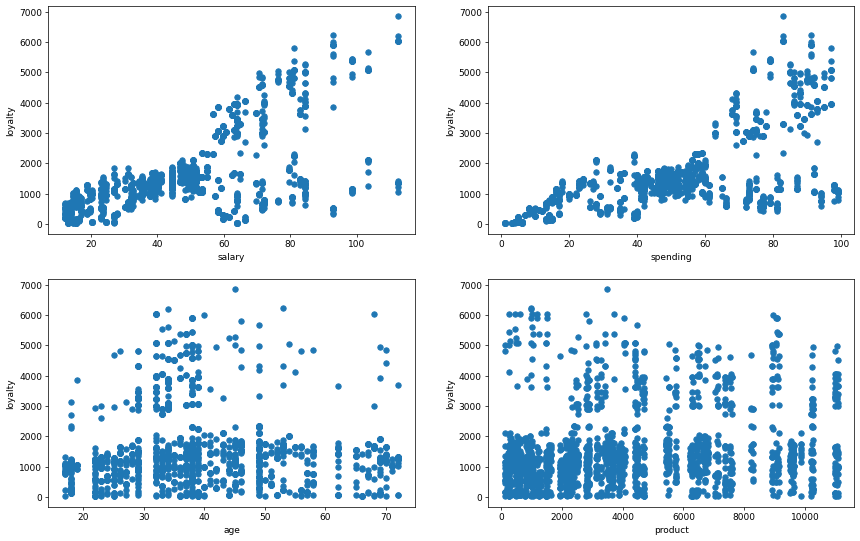

In [95]:
# Visualise the dataset using scatterplots 
plt.figure(figsize=(16,10), dpi=65)

# Create a figure and 2x2 subplots

plt.subplot(2,2,1)
plt.ylabel("loyalty")
plt.xlabel("salary")
plt.scatter(data=reviews, y="loyalty", x="salary")
plt.subplot(2,2,2)
plt.xlabel("spending")
plt.ylabel("loyalty")
plt.scatter(data=reviews, y="loyalty", x="spending")
plt.subplot(2,2,3)
plt.xlabel("age")
plt.ylabel("loyalty")
plt.scatter(data=reviews, y="loyalty", x="age")
plt.subplot(2,2,4)
plt.xlabel("product")
plt.ylabel("loyalty")
plt.scatter(data=reviews, y="loyalty", x="product")

plt.show()

#### 1.6.1. Interpretation of the Scatterplots and Correlation Matrix:
Correlation Matrix shows that spending and salary have a strong affect on loyalty, whereas the product and age do not have any impact on loyalty. This is reinforced by scatterplots. Four scatterplots were generated using salary, age, spending and product variables against the dependaent variable loyalty to find if any correlation exists between loyalty and the four variables. The above scatterplots show a strong positive correlation between loyalty and salary and loyalty and spending. However, there does not seem to be any correlation between age and product. The scatterplot also show the presence of some data points that are further away from the centre or clustered datapoints which could mean the presence of outliers. To check outliers in 'salary'  and 'spending' columns, Interquartile range, upper and lower bounds for the two columns were calculated. Removing the outliers would improve model performance and data accuracy.

## 1.7. Checking and Removing Outliers

To remove outliers, Interquartile Range (IQR) for salary and spending columns of the 'reviews' dataframe were calculated. Firstly, the 1st and the 3rd quartiles (Q1 & Q3) were computed and their difference produced the IQR.The upper and lower bounds were calculated. Any values above the upper bound and below the lower bound will be considered an outlier. In the code,'upper_array' and 'lower_array' will output the numbers of any outliers, if present.

### 1.7.1. Checking outliers in salary column.

In [99]:
# IQR
Q1 = np.percentile(reviews['salary'], 25, method='midpoint')
Q3 = np.percentile(reviews['salary'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

33.620000000000005


In [100]:
# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(reviews['salary'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(reviews['salary'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

Upper Bound: 114.39000000000001
0
Lower Bound: -20.090000000000007
0


### 1.7.2. Checking outliers in spending column.

In [102]:
# IQR
Q1 = np.percentile(reviews['spending'], 25, method='midpoint')
Q3 = np.percentile(reviews['spending'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

41.0


In [103]:
# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(reviews['spending'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(reviews['spending'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

Upper Bound: 134.5
0
Lower Bound: -29.5
0


The result shows that salary and spending columns have no outliers. 

## 1.8. Save the DataFrame as a CSV file

In [106]:
# Create a csv file of the dataframe.
reviews.to_csv('clean_reviews.csv', index=False)


In [107]:
# Import new csv file with Pandas
reviews = pd.read_csv('clean_reviews.csv')

# View Datframe.
reviews

gender  age  salary  spending  loyalty education  product  \
0       Male   18   12.30        39      210  graduate      453   
1       Male   23   12.30        81      524  graduate      466   
2     Female   22   13.12         6       40  graduate      254   
3     Female   25   13.12        77      562  graduate      263   
4     Female   33   13.94        40      366  graduate      291   
...      ...  ...     ...       ...      ...       ...      ...   
1995  Female   37   84.46        69     4031       PhD      977   
1996  Female   43   92.66         8      539       PhD      979   
1997    Male   34   92.66        91     5614  graduate     1012   
1998    Male   34   98.40        16     1048       PhD     1031   
1999    Male   32   92.66         8      479       PhD      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

In [108]:
# Sense check the dataframe.
# Validate if file has been imported successfully
print(reviews.shape)
print(reviews.columns)
print(reviews.dtypes)

# View the DataFrame.
reviews.head()

(2000, 9)
Index(['gender', 'age', 'salary', 'spending', 'loyalty', 'education',
       'product', 'review', 'summary'],
      dtype='object')
gender        object
age            int64
salary       float64
spending       int64
loyalty        int64
education     object
product        int64
review        object
summary       object
dtype: object


gender  age  salary  spending  loyalty education  product  \
0    Male   18   12.30        39      210  graduate      453   
1    Male   23   12.30        81      524  graduate      466   
2  Female   22   13.12         6       40  graduate      254   
3  Female   25   13.12        77      562  graduate      263   
4  Female   33   13.94        40      366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 1.9. Simple Linear Regression using Ordinary Least Square (OLS) 

Simple Linear Regression will be performed with Loyalty Versus Salary and then loyalty Vs Spending using OLS Method. The idea is to find a regression model that can make accurate predictions on the test / unseen data. We will be looking for the value of R-Squared closer to 1 (100%). 

### 1.9.1. Loyalty Vs Salary (Remuneration) Model 1

I fitted the OLS model on the data (loyalty ~ salary) and outputted the regression results.  

In [110]:
# Define the dependent variable 'y'
y = reviews['loyalty'].values.reshape(-1,1)

# Define the independent variable 'x'
x = reviews['salary'].values.reshape(-1,1)


####  Run OLS Test and generate Regression table

In [112]:
# Run the OLS test.
test = ols('loyalty ~ salary', data = reviews).fit()

# View the Regression table summary.
print(test.summary())

                            OLS Regression Results                            
Dep. Variable:                loyalty   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):          2.43e-209
Time:                        00:47:46   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.2

#### The Summary: 


R- Squared value (0.380) suggests that 38% of variability in the dependent variable, loyalty is explained by the independent variable salary, which is not very high. The extremely low p-value (0.00) indicates that salary has a significant impact on loyalty. The salary coefficient is 34.1878. This means that loyalty increases by 34.1878 units for every 1 unit increase of salary. The intercept value is -65.69. The Durbin-Watson value checks autocorrelation. A value of 3.622 suggests negative correlation. The standard error is 52.171 which suggests some variability or uncertainty in the estimate.	The standard error is used to calculate the t-value, which helps assess the statistical significance of the coefficient. The t-value is calculated by dividing the coefficient by its standard error. A large t-value (in absolute terms) implies that the coefficient is statistically significant, while a small t-value suggests the coefficient may not be significant.

In [114]:
# Output estimated parameters as shown in the OLS Regression result above.
# Add a constant (intercept) to the independent variable
x = sm.add_constant(reviews['salary'])

# Extract the estimated parameters (coefficients)
params = test.params
print("Estimated Parameters (Coefficients):")
print(params)

# Extract the standard errors of the parameters
std_errors = test.bse
print("\nStandard Errors:")
print(std_errors)

Estimated Parameters (Coefficients):
Intercept   -65.686513
salary       34.187825
dtype: float64

Standard Errors:
Intercept    52.170717
salary        0.977925
dtype: float64


#### Create Linear Equation / Extract the predicted values.

In [116]:
# x coef: 34.1878.
# Constant coef: -65.6865.
# Create the linear equation 
y_pred = (-65.6865) + 34.1878 * reviews['salary']

# View the output.
y_pred

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: salary, Length: 2000, dtype: float64

#### Plot the Regression

A line of regression is a straight line that best fits the data points in a scatter plot. It represents the relationship between an independent variable and a dependent variable. The line is used to predict the value of the dependent variable based on the value of the independent variable. 

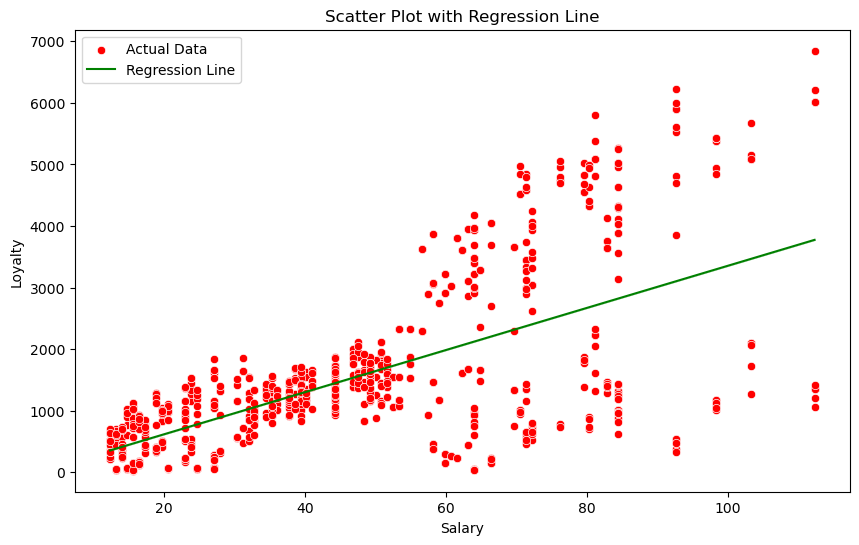

In [118]:
# Plotting the graph
plt.figure(figsize=(10, 6))

# Scatter plot of the actual data points
sns.scatterplot(x=reviews['salary'], y=reviews['loyalty'], color='red', label='Actual Data')

# Plotting the regression line using the predicted values
sns.lineplot(x=reviews['salary'], y=y_pred, color='green', label='Regression Line')

# Add labels and title
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Salary')
plt.ylabel('Loyalty')

# Show plot with legend
plt.legend()
plt.show()

The uneven variance of data points along the line of regression shows the presence of heteroscedacity. To stabilise the variance, log transformation will be done as seen a few lines below.

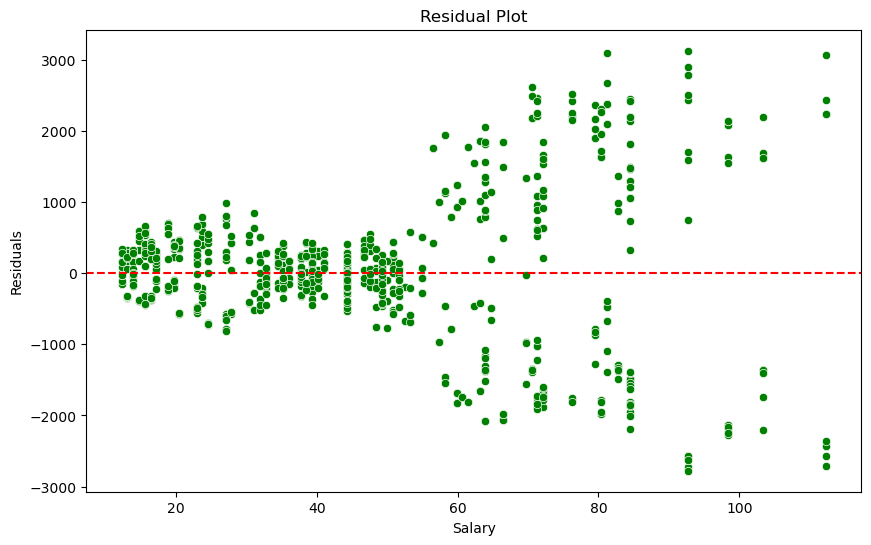

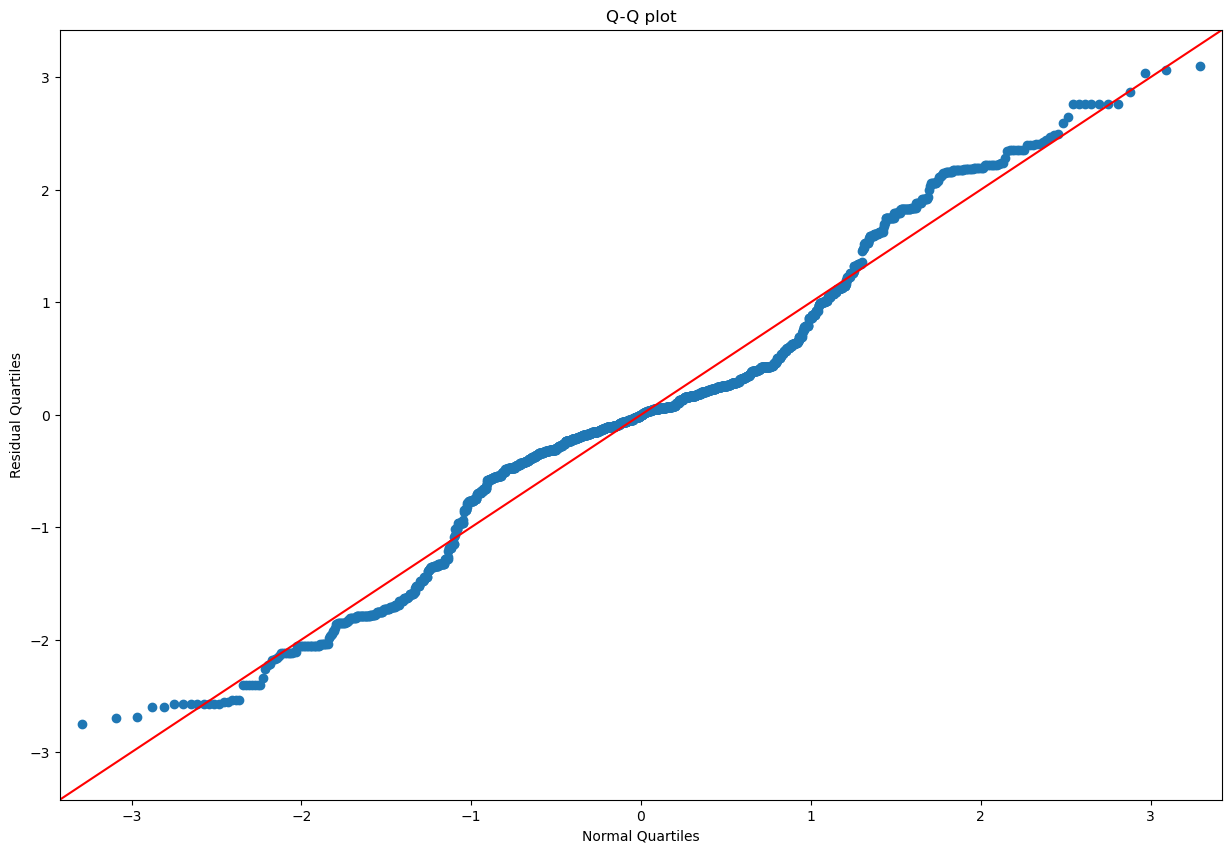

In [120]:
# Plot the residuals=(y-predict - y-observe) versus the x-values.
# Ideally, there should be no pattern in this plot

# Calculate the residuals
residuals = reviews['loyalty'] - y_pred

# Plotting the residual plot
plt.figure(figsize=(10, 6))

# Scatter plot of residuals
sns.scatterplot(x=reviews['salary'], y=residuals, color='green')

# Add a horizontal line at 0 to show where residuals should ideally lie
plt.axhline(0, color='red', linestyle='--')

# Add labels and title
plt.title('Residual Plot')
plt.xlabel('Salary')
plt.ylabel('Residuals')


# Plot the quartiles of the residuals versus the quartiles of the N(0,1)
# The fit=True argument first Standardises the observed data (Residuals) before plotting them
sm.qqplot(residuals, fit=True, line='45')
plt.ylabel("Residual Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

The Residual scatterplot suggests heteroscedacity as the data is not evenly distributed and in a cone shape. The Breusch-Pagan test function on the model residuals and x-variables below also proves the same. The Q-Q Plot shows non linear and non normal distribution of points.

#### Run the Breusch-Pagan test
We'll run the test and then print the values. The code snippet can be written as follows:

Import the necessary library (statsmodels.stats.api as sms) to perform statistical tests. Create a variable (e.g. test) to store the sms.het_breuschpagan() function from the library specified in the previous bullet. Inside the brackets, specify to add the residuals (test.resid) and -variable(s) (test.model.exog). The test. refers to the variable we created to fit the OLS method. Create a variable (e.g. terms) to store the output of the test. Specify the output as a list (e.g. LM stat, LM Test p-value, F-stat, F-test p-value). (Hint: LM stands for Lagrange multiplier.) Print the output as a dictionary with the zip() method.

In [123]:
# Import the necessary library.
import statsmodels.stats.api as sms

# Run the Breusch-Pagan test function on the model residuals and x-variables.
test = sms.het_breuschpagan(test.resid, test.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 1038.6445487288279, 'LM Test p-value': 7.153051772823832e-228, 'F-stat': 2158.631134421931, 'F-test p-value': 3.68e-320}


The LM Test p-value and F-test p-value are extremely smaller than the usual significance level (e.g., 0.05), indicating strong evidence that the variance of the residuals is not constant. Therefore, the model exhibits heteroscedasticity.

To reduce heteroscdacity, log transformation was performed on dependent variable. 

In [125]:
# Log transform the dependent variable (y) to reduce heteroscedasticity
reviews['log_y'] = np.log(reviews['loyalty'])


### 1.9.2. Model 2 loyalty log and Salary

To reduce heteroscdacity, log transformation was performed on dependent variable and OLS regression model was fitted on the logged transformed y variable. Breusch-Pagan test was performed again to check heteroscedacity.

In [127]:
# Fit the regression model with the log-transformed y
X_salary = sm.add_constant(reviews['salary'])  # Add constant for the intercept

# Run the OLS test.
model1 = ols('log_y ~ salary', data = reviews).fit()

# View the Regression table summary.
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  log_y   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     794.3
Date:                Fri, 27 Sep 2024   Prob (F-statistic):          1.98e-147
Time:                        00:47:48   Log-Likelihood:                -2543.1
No. Observations:                2000   AIC:                             5090.
Df Residuals:                    1998   BIC:                             5101.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8505      0.045    131.318      0.0

Strengths: The model is statistically significant overall given the zero p-value, which means that salary is a significant predictor of loyalty.
Weaknesses: The R-squared is relatively low 28.4%, indicating that the model doesn't explain a large proportion of the variation in loyalty. The normality tests also suggest that the residuals are not normally distributed, which may impact the model's assumptions and reliability.

In [129]:
# x coef: 0.0235.
# Constant coef: 5.8505.
# Create the linear equation 
y_pred = (5.8505) + 0.0235 * reviews['salary']

# View the output.
y_pred

0       6.13955
1       6.13955
2       6.15882
3       6.15882
4       6.17809
         ...   
1995    7.83531
1996    8.02801
1997    8.02801
1998    8.16290
1999    8.02801
Name: salary, Length: 2000, dtype: float64

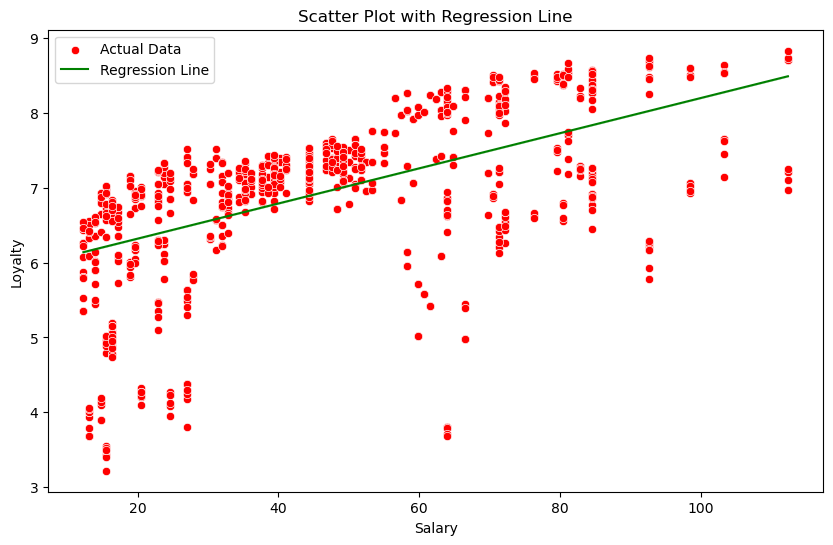

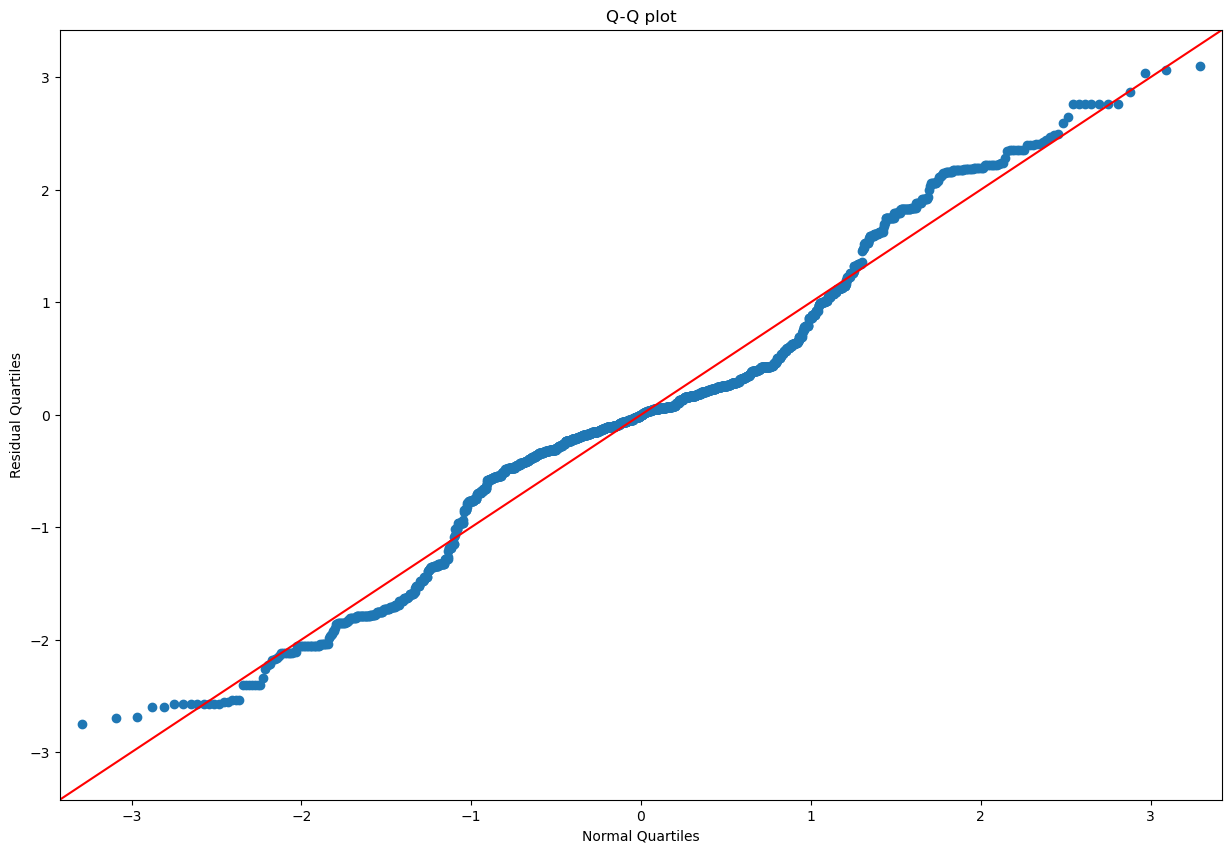

In [130]:
# Plotting the graph
plt.figure(figsize=(10, 6))

# Scatter plot of the actual data points
sns.scatterplot(x=reviews['salary'], y=reviews['log_y'], color='red', label='Actual Data')

# Plotting the regression line using the predicted values
sns.lineplot(x=reviews['salary'], y=y_pred, color='green', label='Regression Line')

# Add labels and title
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Salary')
plt.ylabel('Loyalty')

# Show plot with legend
plt.legend()
plt.show()


# Plot the quartiles of the residuals versus the quartiles of the N(0,1)
# The fit=True argument first Standardises the observed data (Residuals) before plotting them
sm.qqplot(residuals, fit=True, line='45')
plt.ylabel("Residual Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

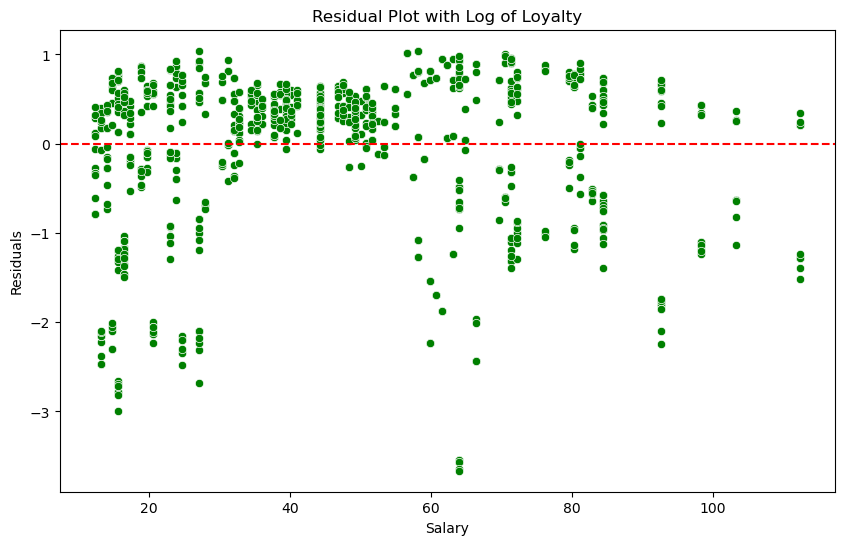

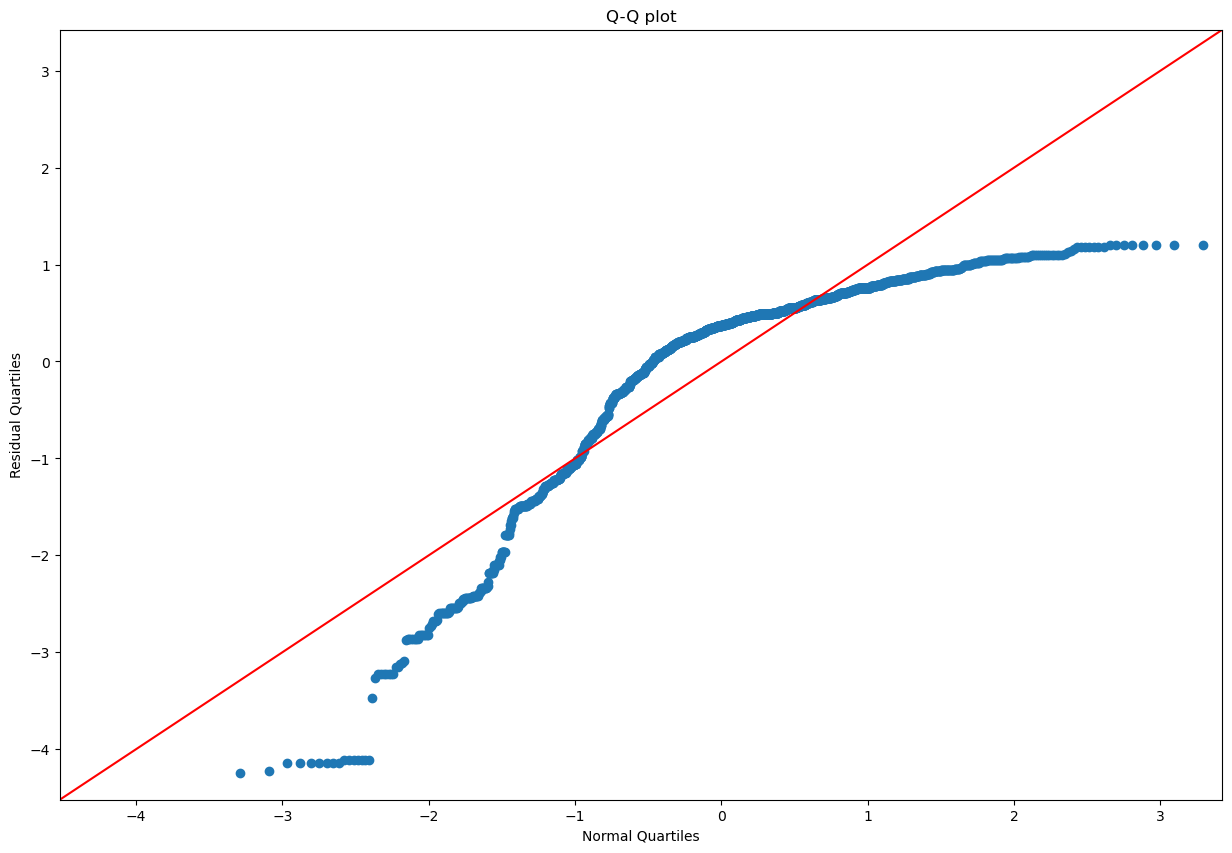

In [131]:
# Plot the residuals=(y-predict - y-observe) versus the x-values.
# Ideally, there should be no pattern in this plot

# Calculate the residuals
residuals = reviews['log_y'] - y_pred

# Plotting the residual plot
plt.figure(figsize=(10, 6))

# Scatter plot of residuals
sns.scatterplot(x=reviews['salary'], y=residuals, color='green')

# Add a horizontal line at 0 to show where residuals should ideally lie
plt.axhline(0, color='red', linestyle='--')

# Add labels and title
plt.title('Residual Plot with Log of Loyalty')
plt.xlabel('Salary')
plt.ylabel('Residuals')


# Plot the quartiles of the residuals versus the quartiles of the N(0,1)
# The fit=True argument first Standardises the observed data (Residuals) before plotting them
sm.qqplot(residuals, fit=True, line='45')
plt.ylabel("Residual Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

Residual scatterplot shows no pattern in data points which means no heteroscdacity. This is further reinforced by conducting the Bruesch - Pagan Test below.

In [133]:
# Import the necessary library.
import statsmodels.stats.api as sms

# Run the Breusch-Pagan test function on the model residuals and x-variables.
model1 = sms.het_breuschpagan(model1.resid, model1.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model1)))

{'LM stat': 0.0476462601837202, 'LM Test p-value': 0.8272107748010233, 'F-stat': 0.04759974789850008, 'F-test p-value': 0.8273160836306521}



The LM statistic is very small (0.0476), suggesting little to no evidence of heteroscedasticity.
The p-value is 0.827 (much larger than 0.05), meaning you fail to reject the null hypothesis. This indicates no evidence of heteroscedasticity in the data, as the residuals likely have constant variance.
F-statistic is very small (0.0476), further indicating no significant heteroscedasticity.

With F-test p-value of 0.8273, which is far greater than 0.05, we again fail to reject the null hypothesis. This means there is no strong evidence of heteroscedasticity.


### 1.9.3. Model 3 - Loyalty Vs Spending (Spending_score)

In [136]:
# Define the dependent variable 'y'
y = reviews['loyalty'].values.reshape(-1,1)

# Define the independent variable 'x'
x = reviews['spending'].values.reshape(-1,1)


#### Run OLS Test and generate Regression table

In [138]:
# Run the OLS test.
test2 = ols('loyalty ~ spending', data = reviews).fit()

# View the Regression table summary.
print(test2.summary())

                            OLS Regression Results                            
Dep. Variable:                loyalty   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):          2.92e-263
Time:                        00:47:50   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.1

#### The Summary:


R- Squared value (0.452) suggests that 45% of variability in the dependent variable, loyalty is explained by the independent variable spending. The extremely low p-value (0.00) indicates that spending score has a significant impact on loyalty. The salary coefficient is 33.0617. This means that loyalty increases by 33.0617 units for every 1 unit increase of spending score. The intercept value is -75.0527. The Durbin-Watson value checks autocorrelation. A value of 1.191 suggests positive autocorrelation. 

In [140]:
# Add a constant (intercept) to the independent variables
x = sm.add_constant(reviews['spending'])

# Extract the estimated parameters (coefficients)
params = test2.params
print("Estimated Parameters (Coefficients):")
print(params)

# Extract the standard errors of the parameters
std_errors = test2.bse
print("\nStandard Errors:")
print(std_errors)

Estimated Parameters (Coefficients):
Intercept   -75.052663
spending     33.061693
dtype: float64

Standard Errors:
Intercept    45.930554
spending      0.814419
dtype: float64


These values are the same as were output by the OLS method.

Standard Errors:

These provide an estimate of the variability or uncertainty of the coefficients.
Intercept (45.930554): The standard error for the intercept suggests that there is significant variability in the estimate of the intercept. Given the large standard error relative to the size of the intercept, the intercept might not be very precise.
Spending (0.814419): The smaller standard error relative to the coefficient for spending suggests that this estimate is more precise.
Interpreting Precision:



#### Create Linear Equation / Extract the predicted values

In [143]:
# x coef: 33.061693.
# Constant coef: -75.052663.
# Create the linear equation 
y_pred_spend = (-75.052663) + 33.061693 * reviews['spending']

# View the output.
y_pred_spend

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending, Length: 2000, dtype: float64

#### Plot the Regression

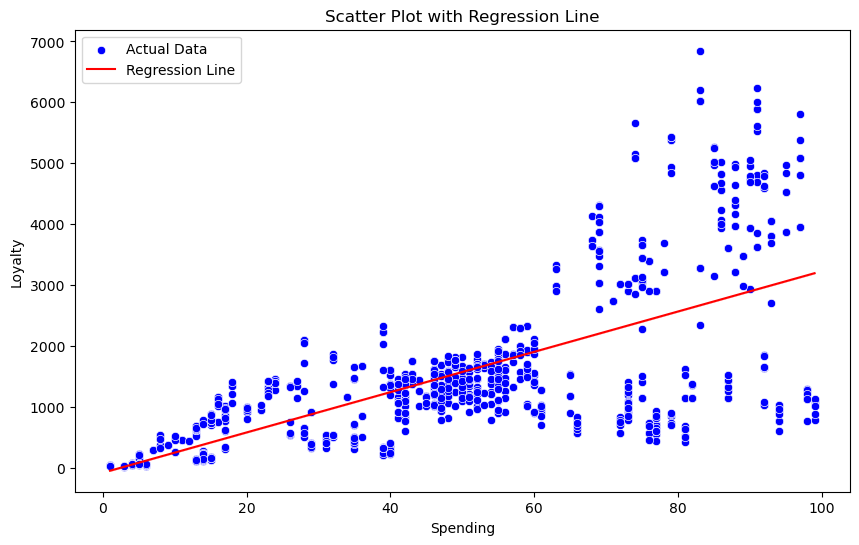

In [145]:
# Add constant for intercept
x = sm.add_constant(reviews['spending']) 

# Define y variable.
y = reviews['loyalty']  

# Define the coefficients (from the previous regression results)
intercept = -75.052663
slope = 33.061693

# Create the linear equation
y_pred_spend = intercept + slope * reviews['spending']

# Plotting the graph
plt.figure(figsize=(10, 6))

# Scatter plot of the actual data points
sns.scatterplot(x=reviews['spending'], y=reviews['loyalty'], color='blue', label='Actual Data')

# Plotting the regression line using the predicted values
sns.lineplot(x=reviews['spending'], y=y_pred_spend, color='red', label='Regression Line')

# Add labels and title
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Spending')
plt.ylabel('Loyalty')

# Show plot with legend
plt.legend()
plt.show()

Text(0, 0.5, 'Residuals')

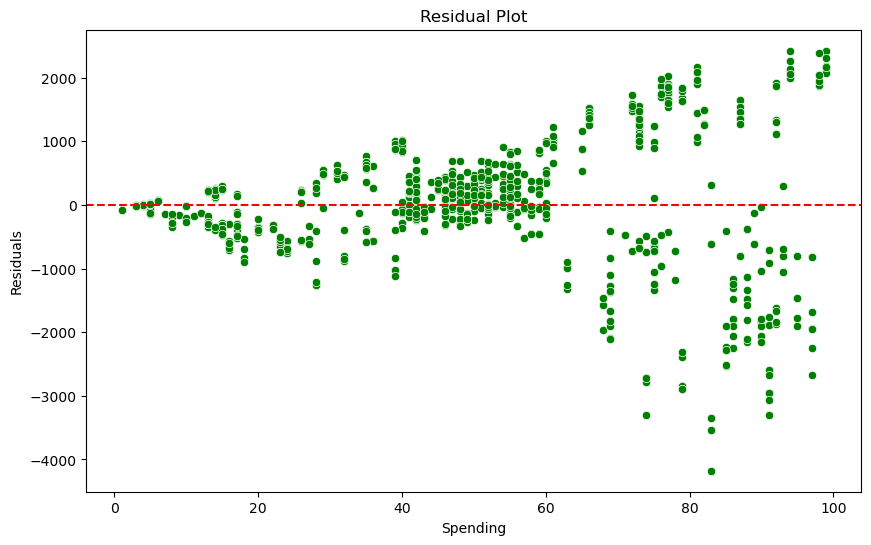

In [146]:
# Plot the residuals=(y-predict - y-observe) versus the x-values.
# Ideally, there should be no pattern in this plot

# Calculate the residuals
residuals2 =  y_pred_spend - reviews['loyalty']

# Plotting the residual plot
plt.figure(figsize=(10, 6))

# Scatter plot of residuals
sns.scatterplot(x=reviews['spending'], y=residuals2, color='green')

# Add a horizontal line at 0 to show where residuals should ideally lie
plt.axhline(0, color='red', linestyle='--')

# Add labels and title
plt.title('Residual Plot')
plt.xlabel('Spending')
plt.ylabel('Residuals')

The Residual plot shows a pattern and the data points are not randomly scattered which suggest heteroscedacity.

The scatterplot suggests heteroscedacity as the data is not evenly distributed and in a cone shape. The Breusch-Pagan test function on the model residuals and x-variables below also proves the same. 

#### Run the Breusch-Pagan test
We'll run the test and then print the values. The code snippet can be written as follows:

Import the necessary library (statsmodels.stats.api as sms) to perform statistical tests. Create a variable (e.g. test) to store the sms.het_breuschpagan() function from the library specified in the previous bullet. Inside the brackets, specify to add the residuals (test.resid) and -variable(s) (test.model.exog). The test. refers to the variable we created to fit the OLS method. Create a variable (e.g. terms) to store the output of the test. Specify the output as a list (e.g. LM stat, LM Test p-value, F-stat, F-test p-value). (Hint: LM stands for Lagrange multiplier.) Print the output as a dictionary with the zip() method.

In [149]:
# Import the necessary library.
import statsmodels.stats.api as sms

# Run the Breusch-Pagan test function on the model residuals and x-variables.
test2 = sms.het_breuschpagan(test2.resid, test2.model.exog)

# Print the results of the Breusch-Pagan test.
terms2 = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms2, test2)))

{'LM stat': 629.9823360215912, 'LM Test p-value': 5.042699614942239e-139, 'F-stat': 918.7507142907729, 'F-test p-value': 2.3037887924497478e-166}


The results indicate very strong evidence of heteroscedasticity in the model.

LM Statistic (Lagrange Multiplier Statistic) is 629.98 which suggests that there is a significant difference in the variance of residuals (i.e., the model may have heteroscedasticity).
The extremely small p-value (5.04e-139) rejects the null hypothesis of homoscedasticity, meaning there is very strong evidence of heteroscedasticity in the residuals.

To reduce heteroscdacity, OLS regression model will be run using the logged transformed y variable. Next, residual scatterplot will be plotted along with Breusch-Pagan test to check heteroscedacity.

### 1.9.4. Model 4 log of loyalty and spending

In [152]:
# Fit the regression model with the log-transformed y
X_spend = sm.add_constant(reviews['spending'])  # Add constant for the intercept

# Run the OLS test.
model2 = ols('log_y ~ spending', data = reviews).fit()

# View the Regression table summary.
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  log_y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     2153.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):          1.44e-319
Time:                        00:47:52   Log-Likelihood:                -2146.7
No. Observations:                2000   AIC:                             4297.
Df Residuals:                    1998   BIC:                             4309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5740      0.034    162.833      0.0

In [153]:
# x coef: 0.0282.
# Constant coef: 5.5740 .
# Create the linear equation 
y_pred_spend = (5.5740 ) + 0.0282 * reviews['spending']

# View the output.
y_pred_spend

0       6.6738
1       7.8582
2       5.7432
3       7.7454
4       6.7020
         ...  
1995    7.5198
1996    5.7996
1997    8.1402
1998    6.0252
1999    5.7996
Name: spending, Length: 2000, dtype: float64

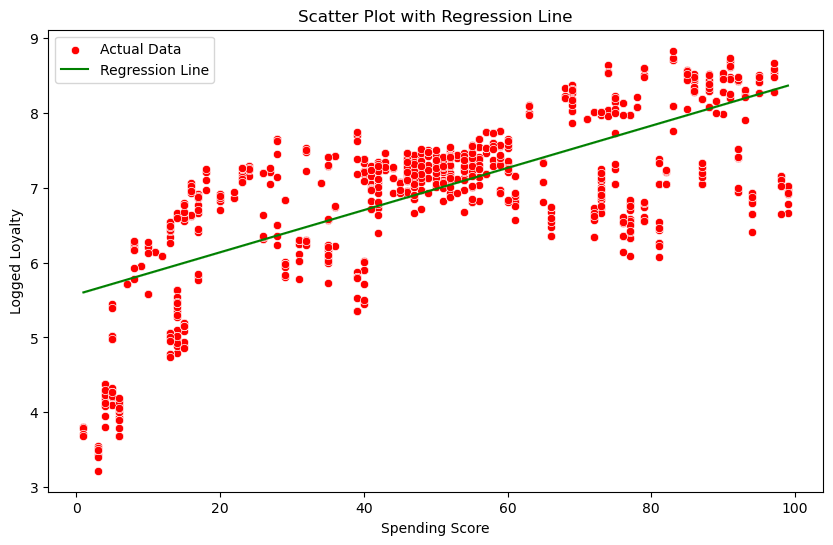

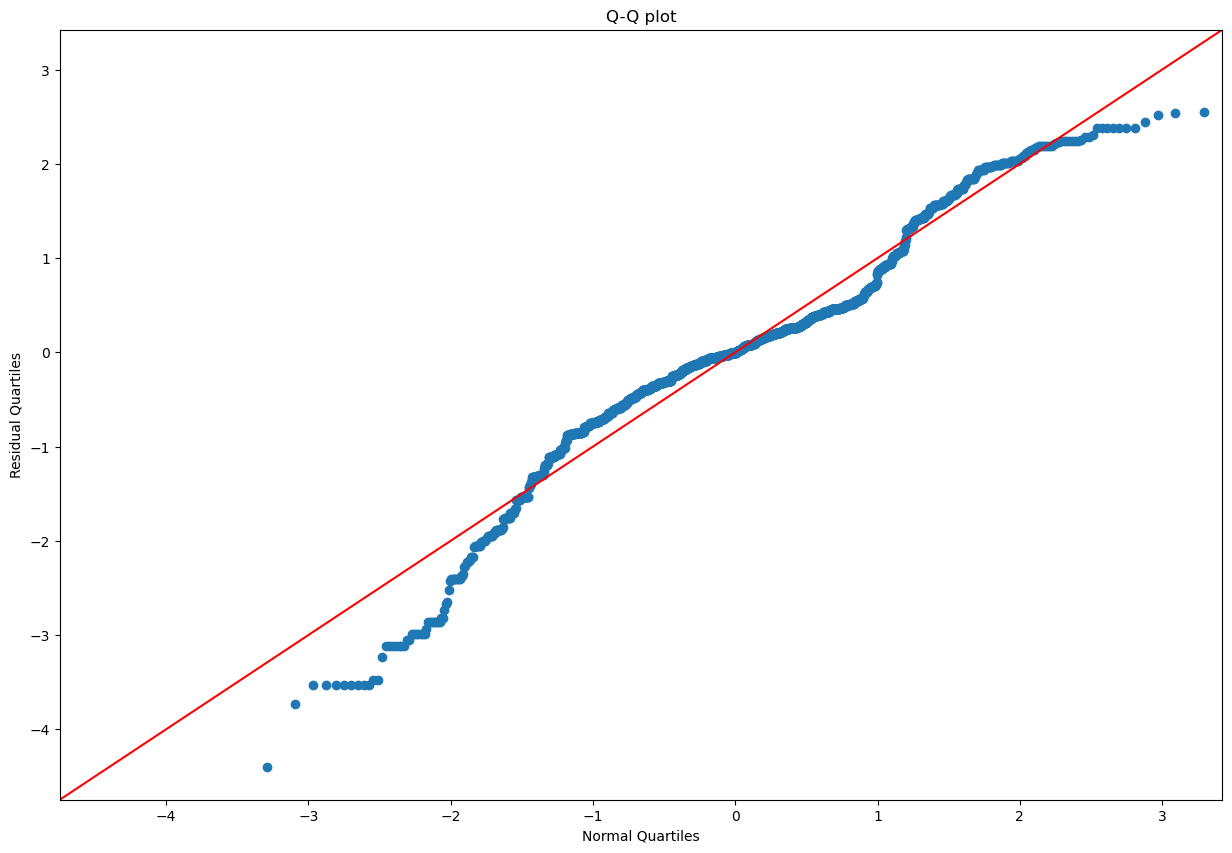

In [154]:
# Plotting the graph
plt.figure(figsize=(10, 6))

# Scatter plot of the actual data points
sns.scatterplot(x=reviews['spending'], y=reviews['log_y'], color='red', label='Actual Data')

# Plotting the regression line using the predicted values
sns.lineplot(x=reviews['spending'], y=y_pred_spend, color='green', label='Regression Line')

# Add labels and title
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Spending Score')
plt.ylabel('Logged Loyalty')

# Show plot with legend
plt.legend()
plt.show()


# Plot the quartiles of the residuals versus the quartiles of the N(0,1)
# The fit=True argument first Standardises the observed data (Residuals) before plotting them
sm.qqplot(residuals2, fit=True, line='45')
plt.ylabel("Residual Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

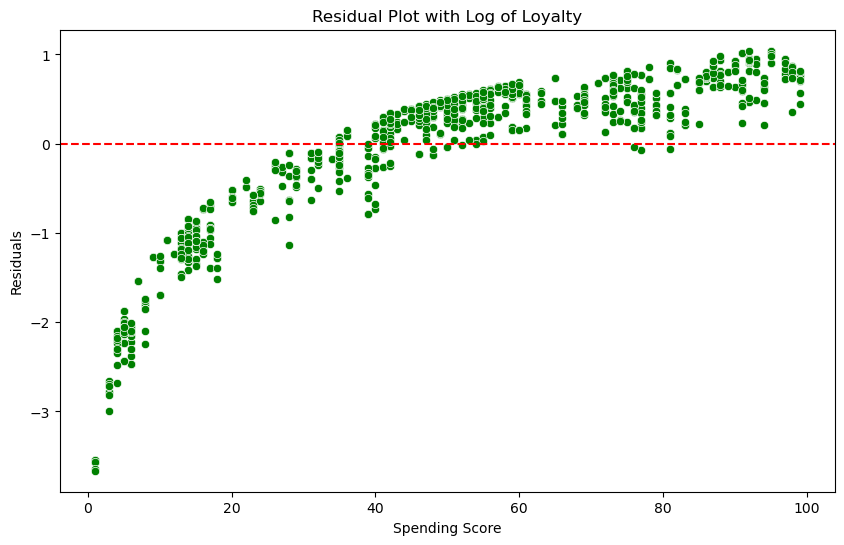

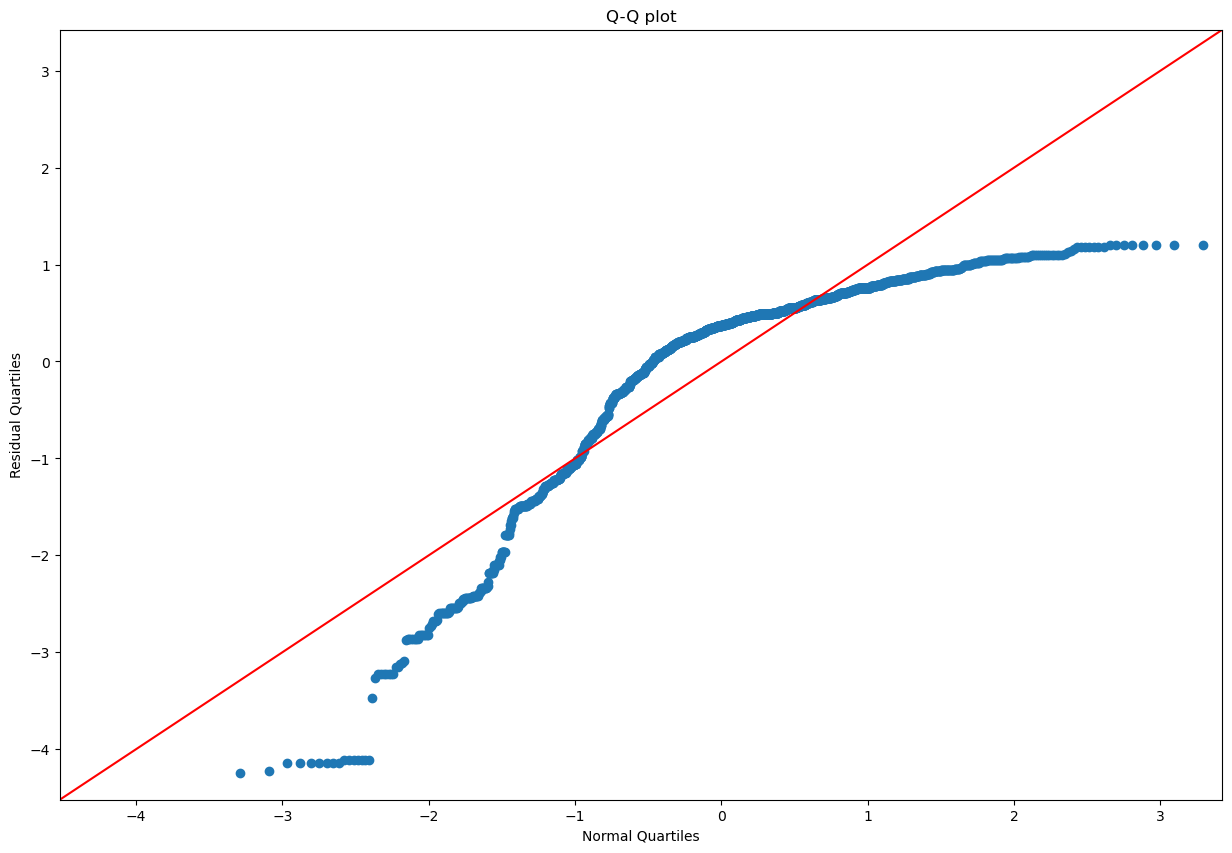

In [155]:
# Plot the residuals=(y-predict - y-observe) versus the x-values.
# Ideally, there should be no pattern in this plot

# Calculate the residuals
residuals = reviews['log_y'] - y_pred

# Plotting the residual plot
plt.figure(figsize=(10, 6))

# Scatter plot of residuals
sns.scatterplot(x=reviews['spending'], y=residuals, color='green')

# Add a horizontal line at 0 to show where residuals should ideally lie
plt.axhline(0, color='red', linestyle='--')

# Add labels and title
plt.title('Residual Plot with Log of Loyalty')
plt.xlabel('Spending Score')
plt.ylabel('Residuals')


# Plot the quartiles of the residuals versus the quartiles of the N(0,1)
# The fit=True argument first Standardises the observed data (Residuals) before plotting them
sm.qqplot(residuals, fit=True, line='45')
plt.ylabel("Residual Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

In [156]:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
model2 = sms.het_breuschpagan(model2.resid, model2.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': 92.4511694198511, 'LM Test p-value': 6.900660585145353e-22, 'F-stat': 96.83497142491689, 'F-test p-value': 2.404357715983474e-22}


The values of LM statistic and the F-statistic have decreased significantly when log of y variable is used. But it is still quite large, and the corresponding p-values are effectively zero.
This means that the null hypothesis of homoscedasticity (constant variance in the residuals) is rejected.
There is strong evidence of heteroscedasticity in this model. The residual scatterplot above also has a kind of pattern to it. 

### 1.9.5. Model 5 - Loyalty Vs Age of Customer (age)

In [159]:
# Define the dependent variable 'y'
y = reviews['loyalty'].values.reshape(-1,1)

# Define the independent variable 'x'
x = reviews['age'].values.reshape(-1,1)


#### Run OLS Test and generate Regression table

In [161]:
# Run the OLS test.
test3 = ols('loyalty ~ age', data = reviews).fit()

# View the Regression table summary.
print(test3.summary())

                            OLS Regression Results                            
Dep. Variable:                loyalty   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 27 Sep 2024   Prob (F-statistic):             0.0577
Time:                        00:47:55   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.0

#### The Summary

An R-squared of 0.002 suggests that the model explains only 0.2% of the variance in loyalty, indicating that age has a very weak relationship with loyalty in this dataset. The p-value of 0.0577 is just above the typical significance level of 0.05, suggesting that the model is not statistically significant at the 5% level but might be considered marginally significant. The Intercept value (1736.5177) means the estimated value of "loyalty" when "age" is zero. While this might not have a practical interpretation if age cannot be zero, it provides a baseline value for the dependent variable in this model.
Age Coefficient (-4.0128):

Overall, the model might not be very useful for predicting loyalty based on age. Hence, no further investigations will be carried out on this model.

### 1.9.6. Model 6 - Loyalty Vs Product

In [164]:
# Define the dependent variable 'y'
y = reviews['loyalty'].values.reshape(-1,1)

# Define the independent variable 'x'
x = reviews['product'].values.reshape(-1,1)


#### Run OLS Test and generate Regression table

In [166]:
# Run the OLS test.
test = ols('loyalty ~ product', data = reviews).fit()

# View the Regression table summary.
print(test.summary())

                            OLS Regression Results                            
Dep. Variable:                loyalty   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     69.70
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           1.27e-16
Time:                        00:47:55   Log-Likelihood:                -17117.
No. Observations:                2000   AIC:                         3.424e+04
Df Residuals:                    1998   BIC:                         3.425e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1254.7724     47.909     26.191      0.0

#### The Summary

An R-squared of 0.034 suggests that the model explains only 3.4% of the variance in loyalty, indicating that product has a very weak relationship with loyalty in this dataset. The p-value of 0.0 is below the typical significance level of 0.05, suggesting that the model is statistically significant. 

The coefficient represents 0.0748 units change in "loyalty" for each one-unit increase in "product".

A value of (2.397) of Durbin-Watson test suggests that there is no significant autocorrelation.

Overall, the model might not be very useful for predicting loyalty based on product. Hence, no further investigations will be carried out on this model.

## 2.0. Insights gathered:


- There was heteroscdacity in spending and salary variables. A log transformation was performed on the dependent variable y (loyalty) to reduce heteroscdacity. New models were created using the new log transformed loyalty variable to check if heteroscdacity has been removed. The new values from OLS Regression summary for salary shows homoscedacity while in spending, some of the heteroscdacity has been removed. 

- There is weak correlation of age and product on loyalty as indicated by the scatterplots above. The relatively low R-Squared value (0.2% for Age, and 0.34% for Prduct) means that loyalty is not affected by these variables. 

- The value of R-Squared for Spending (45%) increased to 52% when lof transformed loyalty variable was used with spending.This suggests that like salary, spending has impact on loyalty. The low p-values mean that the models with spending and salary will be statistically significant.
- The next step will be to perform multiple linear regression using spending and salary as independent variables against loyalty and log of loyalty.  

## 2.1. Multiple Linear Regression

First the data will be visualised using correlation matrix, scatterplots and Q-Q Plots to detect correlation. Both the log transformed y variable and the untransformed y will be used. 

In [170]:
# View and sense check the dataframe
# Print the dataframe
reviews.head()

print(reviews.info())
reviews.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     2000 non-null   object 
 1   age        2000 non-null   int64  
 2   salary     2000 non-null   float64
 3   spending   2000 non-null   int64  
 4   loyalty    2000 non-null   int64  
 5   education  2000 non-null   object 
 6   product    2000 non-null   int64  
 7   review     2000 non-null   object 
 8   summary    2000 non-null   object 
 9   log_y      2000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 156.4+ KB
None


age       salary     spending      loyalty       product  \
count  2000.000000  2000.000000  2000.000000  2000.000000   2000.000000   
mean     39.495000    48.079060    50.000000  1578.032000   4320.521500   
std      13.573212    23.123984    26.094702  1283.239705   3148.938839   
min      17.000000    12.300000     1.000000    25.000000    107.000000   
25%      29.000000    30.340000    32.000000   772.000000   1589.250000   
50%      38.000000    47.150000    50.000000  1276.000000   3624.000000   
75%      49.000000    63.960000    73.000000  1751.250000   6654.000000   
max      72.000000   112.340000    99.000000  6847.000000  11086.000000   

             log_y  
count  2000.000000  
mean      6.982154  
std       1.020456  
min       3.218876  
25%       6.648985  
50%       7.151484  
75%       7.468085  
max       8.831566

### 2.1.1. Visualise the data in Histogram and Q-Q Plot.


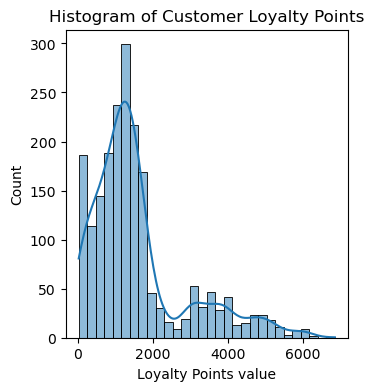

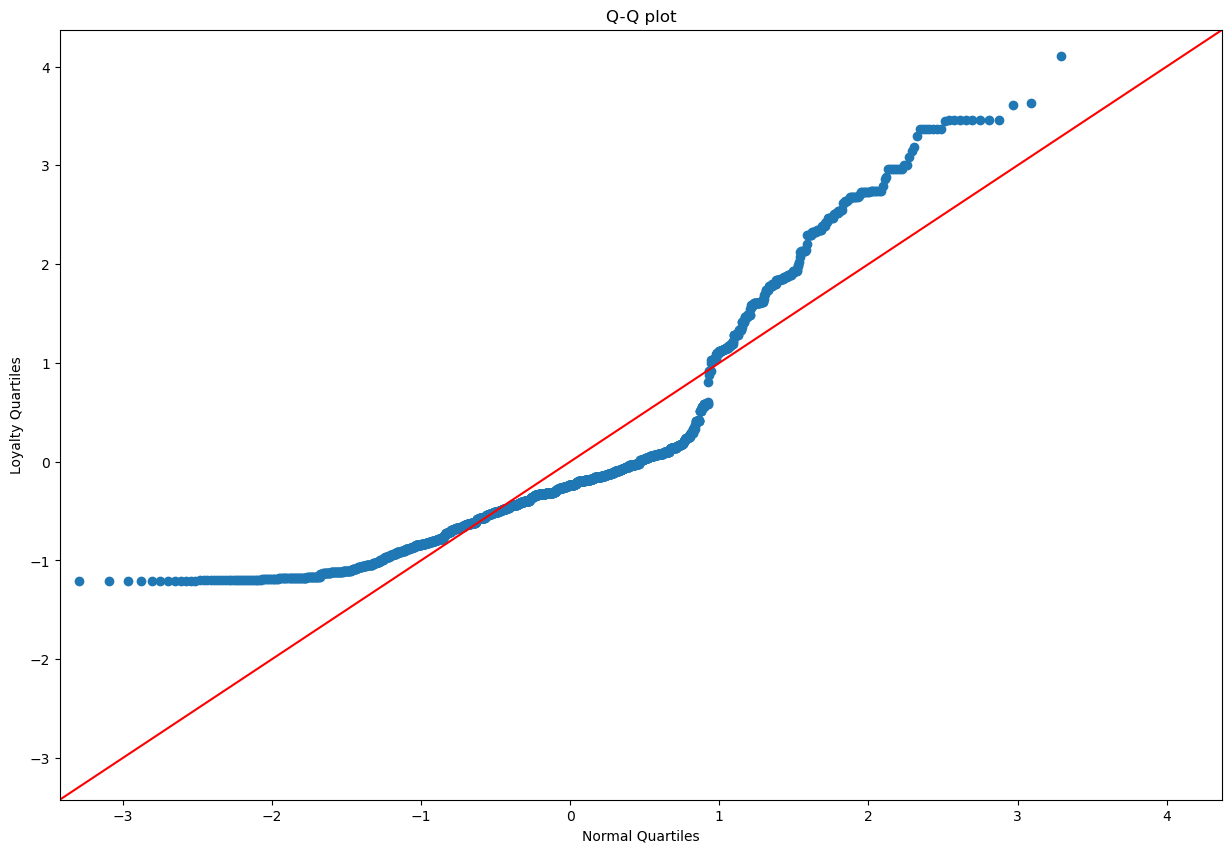

ShapiroResult(statistic=0.8430727369718951, pvalue=1.2431393983403577e-40)


In [172]:
# Draw histogram of variable loyalty
plt.figure(figsize=(8, 4), dpi=100)

plt.subplot(1,2,1)
sns.histplot(reviews, x="loyalty", bins=30, kde=True)
plt.title("Histogram of Customer Loyalty Points")
plt.xlabel("Loyalty Points value")

# Plot the VOL versus the quartiles of the N(0,1)
# The fit=True argument first Standardises VOL before plotting them

#plt.subplot(1,2,2)
sm.qqplot(reviews['loyalty'], fit=True, line='45')
plt.ylabel("Loyalty Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

print(shapiro(reviews['loyalty']))

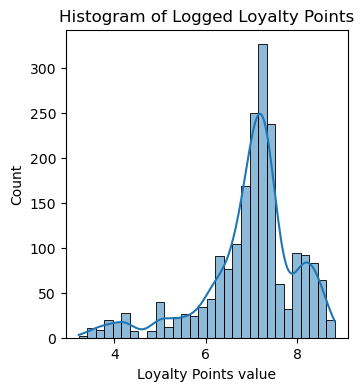

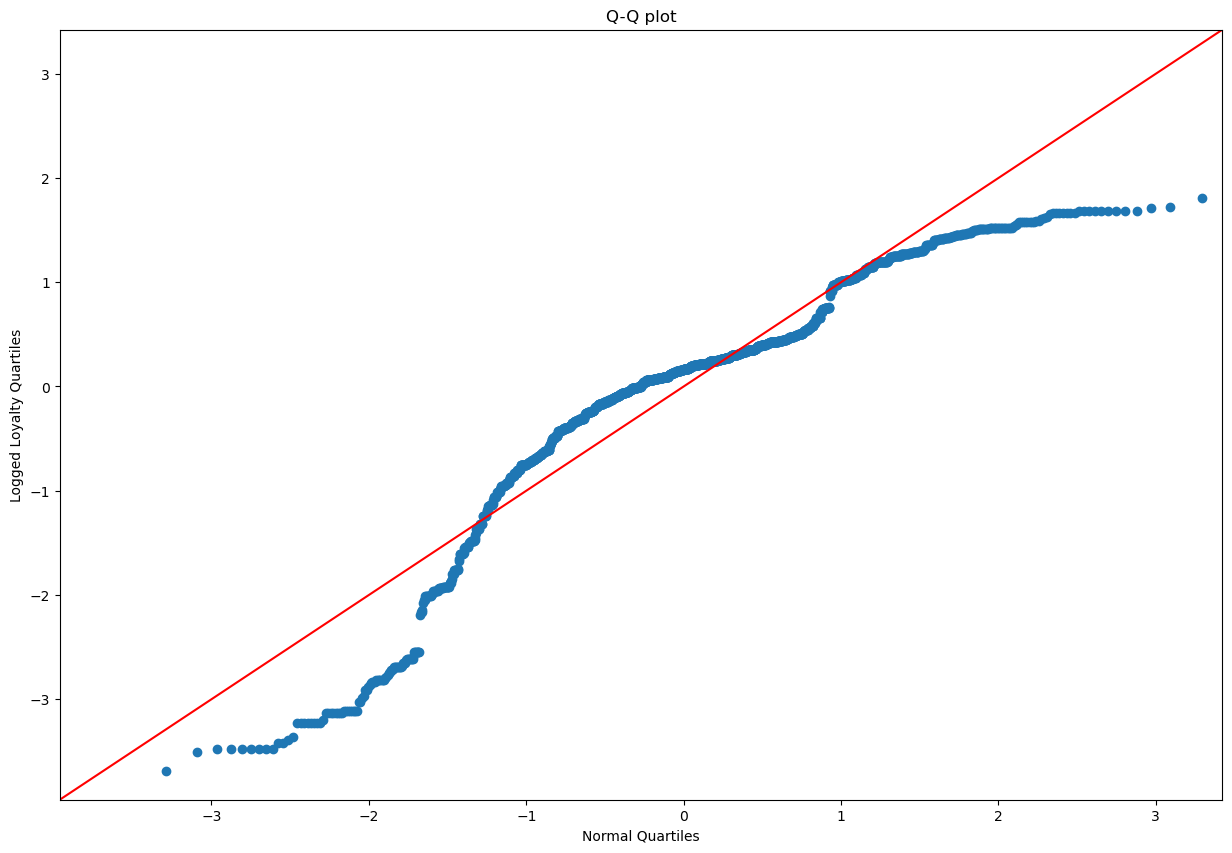

ShapiroResult(statistic=0.9045411555916094, pvalue=1.2331497598615621e-33)


In [173]:
# Draw histogram of variable log_y (log of loyalty variable)
plt.figure(figsize=(8, 4), dpi=100)

plt.subplot(1,2,1)
sns.histplot(reviews, x="log_y", bins=30, kde=True)
plt.title("Histogram of Logged Loyalty Points")
plt.xlabel("Loyalty Points value")

# Plot the VOL versus the quartiles of the N(0,1)
# The fit=True argument first Standardises VOL before plotting them

#plt.subplot(1,2,2)
sm.qqplot(reviews['log_y'], fit=True, line='45')
plt.ylabel("Logged Loyalty Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

print(shapiro(reviews['log_y']))

In [174]:
# Use Correlation matrix using selected columns
selected_columns = ['loyalty', 'log_y','salary', 'age', 'product', 'spending']
correlation_matrix = reviews[selected_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

           loyalty     log_y    salary       age   product  spending
loyalty   1.000000  0.816247  0.616065 -0.042445  0.183600  0.672310
log_y     0.816247  1.000000  0.533359 -0.034590  0.174665  0.720184
salary    0.616065  0.533359  1.000000 -0.005708  0.305309  0.005612
age      -0.042445 -0.034590 -0.005708  1.000000  0.003081 -0.224334
product   0.183600  0.174665  0.305309  0.003081  1.000000 -0.001649
spending  0.672310  0.720184  0.005612 -0.224334 -0.001649  1.000000


#### Summary 

The two histogram show a comparison of the original loyalty and the logged loyalty data. The logged loyalty histogram shows a slight improvement in normalised distribution of data points, though with a negative skewness. The p-value is nearly zero, which means that we can reject the null hypothesis of normality. This means there is strong evidence that the data is not normally distributed.
The W-statistic of 0.905 from Shapiro-Wilk Test also indicates that the data deviates significantly from a normal distribution, although it’s not a very extreme deviation since the statistic is close to 0.9. The transformation does not seem to have had any positive effect on Q _Q Plot either. 

The Correlation Matrix shows that spending and salary have higher correlation values than product and age. With the logged loyalty, the values of spending show slight increase (from 0.6723 to 0.7201) and those of salary show a slight decrease from 0.6160 to 0.5334. Age and Product have a weaker correaltion. 

The graphs below show the same correlation. 

I will run regression model with the loyalty and logged loyalty dependent variable y and multiple independent variables to find the best performing and reliable model for future predictions.

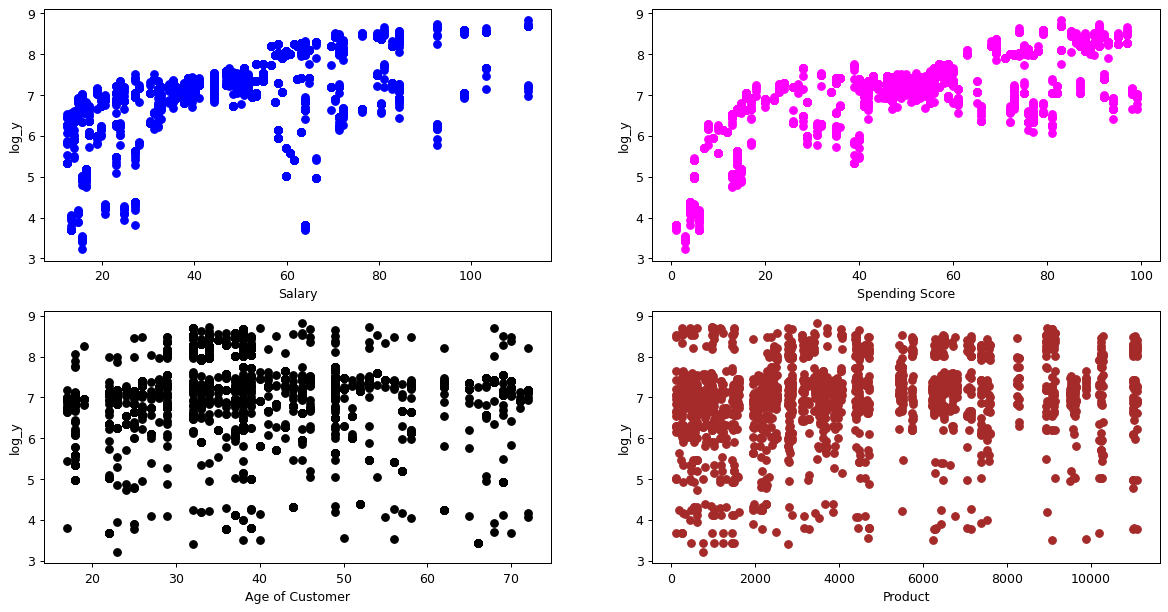

In [176]:
# Visualise the dataset
plt.figure(figsize=(16, 8), dpi=90)
plt.subplot(2,2,1)
plt.xlabel("Salary")
plt.ylabel("log_y")
plt.scatter(data=reviews, y="log_y", x="salary", color='blue')
plt.subplot(2,2,2)
plt.xlabel("Spending Score")
plt.ylabel("log_y")
plt.scatter(data=reviews, y="log_y", x="spending", color='magenta')
plt.subplot(2,2,3)
plt.xlabel("Age of Customer")
plt.ylabel("log_y")
plt.scatter(data=reviews, y="log_y", x="age", color='black')
plt.subplot(2,2,4)
plt.xlabel("Product")
plt.ylabel("log_y")
plt.scatter(data=reviews, y="log_y", x="product", color='brown')

plt.show()

#### Define the x and y variables and fit the Regression Model.

Different combinations of two and three variables are tested and compared to find the best performing model. 

### 2.1.2. Model 7  with log_y (log of loyalty) and 2 independent variables (salary and spending) 

In [178]:
# Define the dependent variable
# The log transformed y variable will be used in MLR
y = reviews['log_y']

# Define the independent variables
X = reviews[['spending', 'salary']] # Model with two variables
# X = reviews[['spending', 'age']]  # Model with two variables
# X = reviews[['spending', 'product']]  # Model with two variables
# X = reviews[['product', 'age']]  # Model with two variables
#X = reviews[['salary', 'age']]  # Model with two variables
#X = reviews[['salary', 'product']]  # Model with two variables
#X = reviews[['spending', 'salary', 'age']]  # Model with three variables
#X = reviews[['spending', 'salary', 'product']]  # Model with three variables
#X = reviews[['spending', 'salary', 'age', 'product']]  # Model with four variables


In [179]:
# Specify the model
multi = LinearRegression()

# Fit the model
multi.fit(X,y)

LinearRegression()

In [180]:
# Call the predictions for X
multi.predict(X)

array([5.83785743, 7.0158427 , 4.93145226, ..., 9.17347463, 7.2040123 ,
       6.84555135])

In [181]:
# Check value for R^2
print("R-Squared: ", multi.score(X,y))

# Check value for intercept
print("Intercept: ", multi.intercept_)

# print values for coefficients
print("Coefficients: ")
list(zip(multi.coef_))

R-Squared:  0.7988505988825918
Intercept:  4.456693665767278
Coefficients: 


[(0.028047268432936808,), (0.023359373384854536,)]

In [182]:
# Pass linear regression through OLS methods.
model1= ols('log_y ~ salary + spending', data = reviews).fit()

# Print the regression table.
#loyalty2.summary()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     3965.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        00:47:57   Log-Likelihood:                -1274.2
No. Observations:                2000   AIC:                             2554.
Df Residuals:                    1997   BIC:                             2571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4567      0.031    145.462      0.000       4.397       4.517
salary         0.0234      0.000     52.741      0.000       0.022       0.024
spending       0.0280      0.000     71.461      0.000       0.027       0.029
==============================================================================
Omnibus:                      577.517   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1749.729
Skew:                          -1.465   Prob(JB):                         0.00
Kurtosis:                       6.524   Cond. No.                         220.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
# Determine heteroscedasticity.
model1 = sms.het_breuschpagan(model1.resid, model1.model.exog) 

terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model1)))

{'LM stat': 158.57636939286036, 'LM Test p-value': 3.677722072056793e-35, 'F-stat': 85.98700603541454, 'F-test p-value': 1.5049803293154068e-36}


In [184]:
# Create a variable to store X
#(Hint: Leverage the sm.add_constant() function.)

X_temp = sm.add_constant(X)
 
# Create an empty dataframe
vif = pd.DataFrame()

# Create a column in the dataframe and calculate each value.
vif['VIF_factor'] = [variance_inflation_factor(X_temp.values,
                                               i) for i in range(X_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = X_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF_factor  features
0         9.0     const
1         1.0  spending
2         1.0    salary


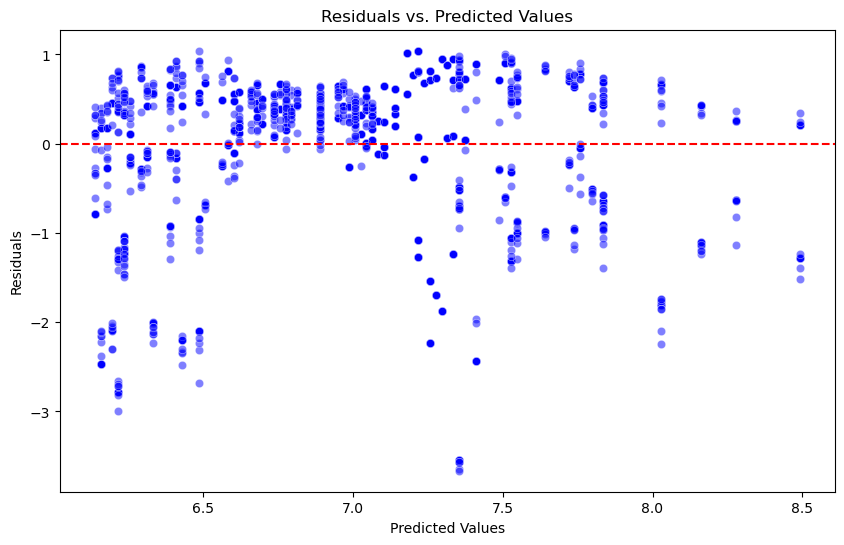

In [185]:
# Define the variables.
X = reviews[['salary', 'spending']]  # Independent variables
y = reviews['log_y']  # Dependent variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Calculate residuals
residuals = y - y_pred

# Scatter plot of residuals vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='blue', alpha=0.5)

# Add a horizontal line at 0 (residuals ideally should be centered around 0)
plt.axhline(0, color='red', linestyle='--')

# Add labels and title
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Show the plot
plt.show()

Residuals vs Predicted Values: This scatter plot shows no patterns in the residuals and the points are randomly distributed around 0.


#### Observations

The R Squared and adjusted R Squared is 80% which shows strong impact of the variables on loyalty. The p-values of both independent variables are 0.0 which is statistically significant. There is no collinearity between the variables as shown by VIF test. Overall, it is a very reliable model. 


### 2.1.3. Model 8 with 3 independent variables (salary, product and spending) and log of loyalty variable

In [189]:
# Define the dependent variable
# The log transformed y variable will be used in MLR
y = reviews['log_y']

# Define the independent variables
X = reviews[['spending', 'salary', 'product']]  # Model with three variables

In [190]:
# Specify the model
multi = LinearRegression()

# Fit the model
multi.fit(X,y)

LinearRegression()

In [191]:
# Call the predictions for X
multi.predict(X)

array([5.8257255 , 7.00386363, 4.91806618, ..., 9.14729355, 7.17655872,
       6.81635464])

In [192]:
# Check value for R^2
print("R-Squared: ", multi.score(X,y))

# Check value for intercept
print("Intercept: ", multi.intercept_)

# print values for coefficients
print("Coefficients: ")
list(zip(multi.coef_))

R-Squared:  0.7990741413562907
Intercept:  4.4447784469774225
Coefficients: 


[(0.028049332906562603,), (0.02314781563104937,), (5.088157308609532e-06,)]

In [193]:
# Pass linear regression through OLS methods.
model2= ols('log_y ~ salary + spending + product', data = reviews).fit()

# Print the regression table.
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     2646.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        00:47:57   Log-Likelihood:                -1273.1
No. Observations:                2000   AIC:                             2554.
Df Residuals:                    1996   BIC:                             2577.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4448      0.032    140.412      0.000       4.383       4.507
salary         0.0231      0.000     49.783      0.000       0.022       0.024
spending       0.0280      0.000     71.488      0.000       0.027       0.029
product     5.088e-06   3.41e-06      1.490      0.136   -1.61e-06    1.18e-05
==============================================================================
Omnibus:                      584.556   Durbin-Watson:                   1.186
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1806.605
Skew:                          -1.475   Prob(JB):                         0.00
Kurtosis:                       6.603   Cond. No.                     1.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model has multicollinearity. Heance this will not be investigated further.

### 2.1.4. Model 9 with 4 independent variables (spending, salary, age and product) and log_y

In [196]:
# Define the dependent variable
# The log transformed y variable will be used in MLR
y = reviews['log_y']

# Define the independent variables
X = reviews[['spending', 'salary', 'age', 'product']]  # Model with four variables

In [197]:
# Specify the model
multi = LinearRegression()

# Fit the model
multi.fit(X,y)

LinearRegression()

In [198]:
# Call the predictions for X
multi.predict(X)

array([5.59213463, 6.87158362, 4.68607828, ..., 9.14222431, 7.08214151,
       6.69183243])

In [199]:
# Check value for R^2
print("R-Squared: ", multi.score(X,y))

# Check value for intercept
print("Intercept: ", multi.intercept_)

# print values for coefficients
print("Coefficients: ")
list(zip(multi.coef_))

R-Squared:  0.8166693948868521
Intercept:  3.980078054460942
Coefficients: 


[(0.029243264493264705,),
 (0.023182774309680645,),
 (0.010233660572209301,),
 (4.8901739111274625e-06,)]

In [200]:
# Pass linear regression through OLS methods.
model3= ols('log_y ~ salary + spending + product + age', data = reviews).fit()

# Print the regression table.
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     2222.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        00:47:57   Log-Likelihood:                -1181.4
No. Observations:                2000   AIC:                             2373.
Df Residuals:                    1995   BIC:                             2401.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9801      0.045     88.064      0.000       3.891       4.069
salary         0.0232      0.000     52.182      0.000       0.022       0.024
spending       0.0292      0.000     76.019      0.000       0.028       0.030
product      4.89e-06   3.26e-06      1.499      0.134   -1.51e-06    1.13e-05
age            0.0102      0.001     13.837      0.000       0.009       0.012
==============================================================================
Omnibus:                      681.310   Durbin-Watson:                   1.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2618.260
Skew:                          -1.639   Prob(JB):                         0.00
Kurtosis:                       7.546   Cond. No.                     2.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model has multicollinearity. Heance this will not be investigated further.

### 2.1.5. Model 10 with 3 independent variables (spending, salary and age) and log of loyalty dependent variable.

In [203]:
# Define the dependent variable
# The log transformed y variable will be used in MLR
y = reviews['log_y']

X = reviews[['spending', 'salary', 'age']]  # Model with three variables

In [204]:
# Specify the model
multi = LinearRegression()

# Fit the model
multi.fit(X,y)

LinearRegression()

In [205]:
# Call the predictions for X
multi.predict(X)

array([5.6036833 , 6.88303351, 4.69883303, ..., 9.16738377, 7.10848149,
       6.71983337])

In [206]:
# Check value for R^2
print("R-Squared: ", multi.score(X,y))

# Check value for intercept
print("Intercept: ", multi.intercept_)

# print values for coefficients
print("Coefficients: ")
list(zip(multi.coef_))

R-Squared:  0.8164629142894955
Intercept:  3.9913086435691185
Coefficients: 


[(0.02924184762878982,), (0.023386112916386505,), (0.010238522619688861,)]

In [207]:
# Predict Loyalty for given values of the explanatory variables
New_salary = 3.5
New_spending = 20
New_age = 25

#NewPred_loyalty = multi.predict([[New_salary, New_spending]])
NewPred_loyalty = multi.predict([[New_salary, New_spending, New_age]])

print("Predicted value of Loyalty is: \n", math.exp(NewPred_loyalty))

Predicted value of Loyalty is: 
 123.63583548249403


In [208]:
# Pass linear regression through OLS methods.
model4 = ols('log_y ~ salary + spending + age', data = reviews).fit()

# Print the regression table.
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     2960.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        00:47:57   Log-Likelihood:                -1182.5
No. Observations:                2000   AIC:                             2373.
Df Residuals:                    1996   BIC:                             2395.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9913      0.045     89.524      0.000       3.904       4.079
salary         0.0234      0.000     55.263      0.000       0.023       0.024
spending       0.0292      0.000     75.991      0.000       0.028       0.030
age            0.0102      0.001     13.840      0.000       0.009       0.012
==============================================================================
Omnibus:                      675.562   Durbin-Watson:                   1.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2551.834
Skew:                          -1.631   Prob(JB):                         0.00
Kurtosis:                       7.470   Cond. No.                         377.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Summary of Model 10:

R-Squared: 0.8164629142894955

Intercept: 3.9913086435691185

Coefficients:

[(0.02924184762878982,), (0.023386112916386505,), (0.010238522619688861,)

#### Observations

Model 7 with two independent variables (spending and salary) has a high value of R-Squared (0.799) = 80% and zero p-values which make it the best performing model. Model 10 with 3 independent variables (salary, age and spending) seems to be equally good model as it has the highest R-Squared and adjusted R Squared values as seen below. The p-vlaues for all variables are zero which is less than 0.05, which is statistically significant.  Model 8 (with 3 variables - salary, product and spending) and model 9 (with 4 variables - salary, spending, age and product) both have a large value of condition number which suggests multicollinearity. The presence of multicollinearity, a condition where there is linearity between the independent variables, voilates the assumptions of Multiple Linear Regression. Hence, these two models will be rejected. Model 5 will also be rejected because it has the lowest R Squared value of 2% suggesting weak impact on the dependent variable.


Therefore, model 4 will be chosen for conducting Multiple Linear Regression.

The condition number, which measures collinearity in regression analysis, of the model is over the threshold for non collinearity. Even though it has a high value, yet it is quite low from the other two models. To check how much the variance of the coefficient is inflated due to multicollinearity, VIF (Variance Inflation Factor) test will be performed.

Out of the two best performing models, Model 7 will be chosen for training and testing the data because it has lower value of Condition number (220) as compared with model 10 (377). Condition number measures multicollinearity. Also because we will avoid the complexity that comes with using more variables. 

In [211]:
# Create a variable to store X
#(Hint: Leverage the sm.add_constant() function.)
#X = reviews[['spending', 'salary', 'age']] 
X_temp = sm.add_constant(X)
 
# Create an empty dataframe
vif = pd.DataFrame()

# Create a column in the dataframe and calculate each value.
vif['VIF_factor'] = [variance_inflation_factor(X_temp.values,
                                               i) for i in range(X_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = X_temp.columns

# Print the values to one decimal points.
print(vif.round(1))


   VIF_factor  features
0        20.8     const
1         1.1  spending
2         1.0    salary
3         1.1       age


**Interpretation of VIF Values:**

Since the VIF values of all variables is close to 1, there is no multicollinearity in any of the three variables.

#### Check for Heteroscdacity using Breusch-Pagan Test.

In [214]:
# Determine heteroscedasticity.
model4 = sms.het_breuschpagan(model4.resid, model4.model.exog) 

terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model4)))

{'LM stat': 150.800381677187, 'LM Test p-value': 1.7705421992305806e-32, 'F-stat': 54.257268720518844, 'F-test p-value': 1.036102918774946e-33}


#### Evidence of Heteroscedasticity:

Both the LM statistic and the F-statistic are very high, and their p-values are extremely small, indicating strong evidence against the null hypothesis of homoscedasticity. This means that the model has heteroscedacity and it may not be a reliable prediction model. 

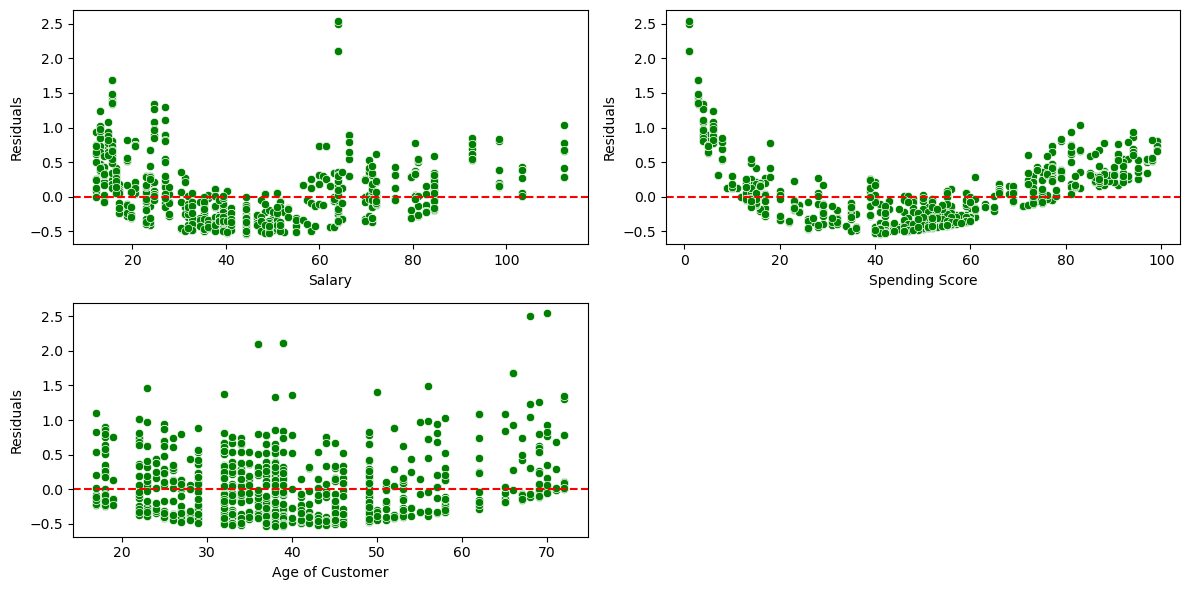

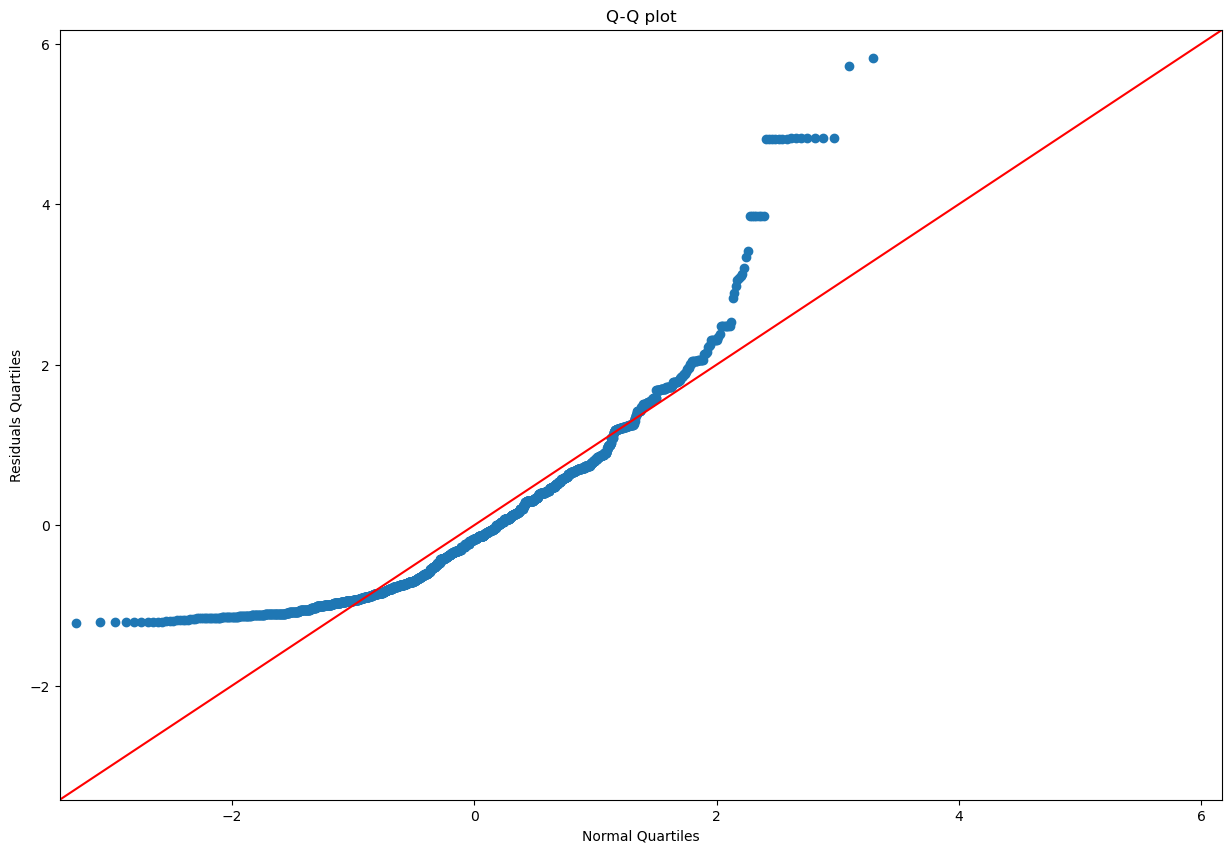

In [216]:
# Plot the residuals=(y-predict - y-observe) versus the x-values.
# Ideally, there should be no pattern in this plot

# Define a variable for predicted values
Pred_loyalty = multi.predict(X)
# Calculate the residuals
log_residuals =  Pred_loyalty - reviews['log_y']


# Plot the residuals scatterplot versus the independent variables
plt.figure(figsize=(12, 6))  # Adjust figure size
plt.subplot(2,2,1)

# Scatter plot of residuals
sns.scatterplot(x=reviews['salary'], y=log_residuals, color='green')
# Add a horizontal line at 0 to show where residuals should ideally lie
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Salary")
plt.ylabel("Residuals")
plt.subplot(2,2,2)
sns.scatterplot(x=reviews['spending'], y=log_residuals, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Spending Score")
plt.ylabel("Residuals")
plt.subplot(2,2,3)
sns.scatterplot(x=reviews['age'], y=log_residuals, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Age of Customer")
plt.ylabel("Residuals")
plt.tight_layout()  # Adjust layout for subplots

# Plot the quartiles of the residuals versus the quartiles of the N(0,1)
# The fit=True argument first Standardises the observed data (Residuals) before plotting them
sm.qqplot(log_residuals, fit=True, line='45')
plt.ylabel("Residuals Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()



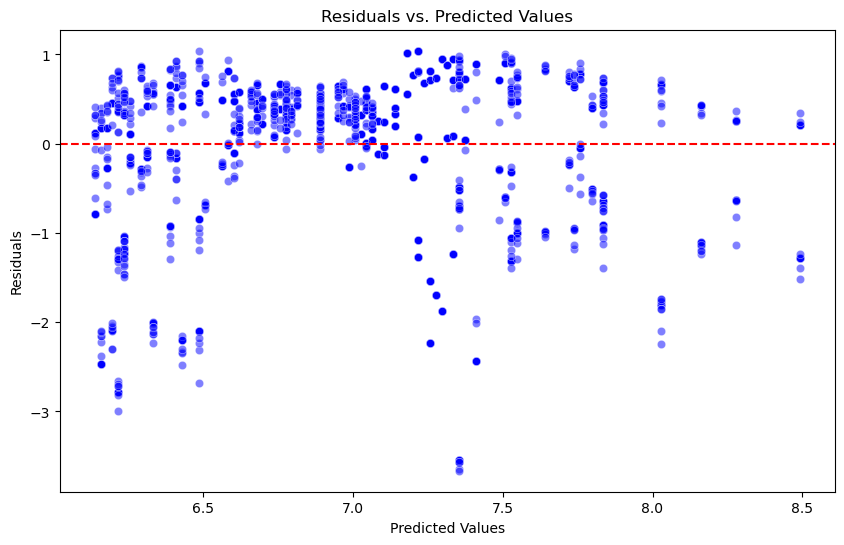

In [217]:
# Define the variables.
X = reviews[['salary', 'spending', 'age']]  # Independent variables
y = reviews['log_y']  # Dependent variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Calculate residuals
residuals = y - y_pred

# Scatter plot of residuals vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='blue', alpha=0.5)

# Add a horizontal line at 0 (residuals ideally should be centered around 0)
plt.axhline(0, color='red', linestyle='--')

# Add labels and title
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Show the plot
plt.show()

### 2.2. Train and test subsets with (MLR) multiple linear regression Using spending and salary with log of loyalty



In [219]:
# Define the dependent variable.
y = reviews['log_y']  

# Define the independent variable.
X = reviews[['salary', 'spending']] 

In [220]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [221]:
# Call the predictions for X (array).
mlr.predict(X) 

array([5.83785743, 7.0158427 , 4.93145226, ..., 9.17347463, 7.2040123 ,
       6.84555135])

In [222]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))  

R-squared:  0.7988505988825918
Intercept:  4.456693665767279
Coefficients:


[('salary', 0.023359373384854522), ('spending', 0.028047268432936798)]

In [223]:
# Pass linear regression through OLS methods.
mlr_model= ols('log_y ~ salary + spending', data = reviews).fit()

# Print the regression table.
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     3965.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        00:47:58   Log-Likelihood:                -1274.2
No. Observations:                2000   AIC:                             2554.
Df Residuals:                    1997   BIC:                             2571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4567      0.031    145.462      0.000       4.397       4.517
salary         0.0234      0.000     52.741      0.000       0.022       0.024
spending       0.0280      0.000     71.461      0.000       0.027       0.029
==============================================================================
Omnibus:                      577.517   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1749.729
Skew:                          -1.465   Prob(JB):                         0.00
Kurtosis:                       6.524   Cond. No.                         220.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2.3. Split and train the dataset with a 80/20 split.

In [225]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.20,
                                                                            random_state = 5)

In [226]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
train_model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector (for test data).
Y_pred_train = train_model.predict(sm.add_constant(X_test))

# Call a summary of the model (on the fitted model, not the predictions).
print_model = train_model.summary()

# Print the summary of the trained model
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  log_y   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     3107.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        00:47:58   Log-Likelihood:                -975.91
No. Observations:                1600   AIC:                             1958.
Df Residuals:                    1597   BIC:                             1974.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4803      0.034    130.769      0.0

### 2.4. Run a regression test
First train the model and then test the model.

In [228]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)  

LinearRegression()

In [229]:
# Call the predictions for X in the train set.
y_pred_mlr = mlr.predict(X_train)  

# Print the predictions.
print("Prediction for train set: {}".format(y_pred_mlr)) 

Prediction for train set: [6.59040611 6.15223909 7.46701762 ... 7.05368491 4.99311931 6.73420261]


### 2.5. Test the Model

In [231]:
# Call the predictions for X in the test set.
y_pred_test = mlr.predict(X_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_test))  

Prediction for test set: [6.95105241 8.47898332 7.10141132 7.02068576 6.71285059 6.70650328
 8.37502585 6.71285059 8.35367383 7.6641178  5.60592464 6.01004501
 5.90587244 6.73420261 6.78960128 6.91728322 5.89743014 6.99298642
 8.23310923 7.6641178  7.07608443 7.5884146  7.05368491 5.28092741
 9.17698164 8.08617026 8.47528592 7.03889531 5.23397103 6.98691658
 6.87611923 8.97938889 6.69038871 8.80502804 6.73894751 7.32168106
 5.72648923 6.17861348 7.63774342 6.29548067 7.11697096 6.55244696
 6.58726364 6.99298642 5.10021925 6.96054219 6.77404165 7.06157229
 4.95460523 7.02305821 7.0800593  4.92927834 8.14289388 6.96026473
 5.84942628 7.0436402  6.87137434 6.59040611 6.81702316 8.81821523
 8.73037233 6.99431138 7.29083924 6.77878654 6.947355   6.7436924
 7.23460818 6.59173107 6.15223909 6.87793676 7.29083924 5.91194229
 8.81821523 8.50061281 7.18450933 6.90354111 5.91563969 8.55705897
 7.30849386 6.70650328 7.27025725 5.89743014 8.30881244 6.71285059
 6.55244696 5.72648923 6.43265239 6.44

In [232]:
# Print the R-squared value.
print(mlr.score(X_test, Y_test)*100) 

80.74058924663122


### 2.6. Check for multicollinearity with Python

In [234]:
# Add a constant.
x_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  

   VIF Factor  features
0        9.45     const
1        1.00    salary
2        1.00  spending


### 2.7.  Evaluate the model

In [236]:
# Call the ‘metrics.mean_absolute_error’ function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(Y_test, y_pred_test))  

# Call the ‘metrics.mean_squared_error’ function.
print('Mean Square Error (Final):', metrics.mean_squared_error(Y_test, y_pred_test))  

# Calculate the RMSE.
print("Root Mean Squared Error: ", 
     math.sqrt(metrics.mean_squared_error(Y_test, y_pred_test))) 

Mean Absolute Error (Final): 0.37295007046520906
Mean Square Error (Final): 0.2547969872543917
Root Mean Squared Error:  0.5047741943229583


### 2.8. Summary of Observations:

The errors in the predictions are relatively low (approximately 0.37–0.50 units), which implies that the model performs reasonably well and produces predictions that are fairly close to the actual values.

Furthermore, there is no collinearity between the independent variables.

The R-Squared value of the test data is 81% which is a very good value. It proves that it can potentially be a reliable training model for predicting the value of y, provided it has no heteroscedasticity. In other words, it means that we can predict about a customers loyalty score based on their salary and spending score. 

# 2. Exploring the structure using Decision Tree Regressor.


## Scenario
Turtle Games’s marketing department would like to know if decision trees can be used to better understand how the different features (variables) contribute to the accumulation of loyalty points. A decision tree regressor will be used to evaluate the impact and important decision points on the accumulation of loyalty points. You need to grow and prune a decision tree regressor and then visualise and interpret the output. Make sure to comment on the potential usefulness in decision-making processes and your observations regarding the model.


### Instructions:

- Prepare the data for creating your decision tree.
- Import the CSV file you have prepared in Week 1.
- Create a new DataFrame with the appropriate columns.
- Specify that loyalty points is the target variable (Y) and should be excluded from your input data.
- Specify X for the independent variables and y as the dependent variable. Therefore, df[cols] will be the independent variables and the column containing loyalty points the dependent variable.
- Explore the new DataFrame.
- Split the data set into a train and test sets for both X and y at a 70:30 ratio. As previously, random_state=42.
- Create a decision tree regressor to explore the impact of other features on the loyalty points.
- Import the DecisionTreeRegressor class from the sklearn.tree library.
- Create a variable (e.g. regressor) to store the DecisionTreeRegressor() class. (As previously, random_state=42.).
- Fit the regressor object to the data set with the fit() function.
- Remember to prune your tree using basic pruning strategies and compare the performance before and after applying the pruning strategy.
- Plot the final decision tree.
- Fit a final model and interpret the output.
- Justify your selection of pruning strategy implemented and interpret the output.
- Evaluate the usefulness of the obtained result and interpret the tree and how it could be used to inform business decisions in the organisation.
- Summarise (150–200 words) the most important business insights, anything you would like to explore further, and suggested future actions.

### 1. Load and prepare the data

Import the necessary libraries: Pandas, Numpy, scipy, sklearn, imblearn, and statsmodels.api, and math. Filter out any warning messages using the warnings.filterwarnings() function. Import metrics from sklearn to prepare the accuracy report. Import train_test_split from sklearn.model_selection to split the data set into train and test data sets. Upload/read the CSV file (clean_reviews.csv) that was cleaned before conducting week 1 assignment activity. Print a summary of the DataFrame to perform a quick sense-check.

In [383]:
# Import all the necessary packages
import numpy as np
import pandas as pd
import scipy as scp
import sklearn
import statsmodels.api as sm  
import math
from sklearn import metrics
import matplotlib.pyplot as plt

# Scikit-learn imports
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Warnings and plotting settings
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]

In [385]:
# Import the cleaned csv file that was created in week 1.
df2 = pd.read_csv('clean_reviews.csv')

print(df2.info())
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     2000 non-null   object 
 1   age        2000 non-null   int64  
 2   salary     2000 non-null   float64
 3   spending   2000 non-null   int64  
 4   loyalty    2000 non-null   int64  
 5   education  2000 non-null   object 
 6   product    2000 non-null   int64  
 7   review     2000 non-null   object 
 8   summary    2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


gender  age  salary  spending  loyalty education  product  \
0    Male   18   12.30        39      210  graduate      453   
1    Male   23   12.30        81      524  graduate      466   
2  Female   22   13.12         6       40  graduate      254   
3  Female   25   13.12        77      562  graduate      263   
4  Female   33   13.94        40      366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 2. Prepare the Data

There are 2 columns that are not numeric, i.e, 'gender' and 'education'. The 'education' variable has meaningful categories, so I will use LabelEncoder to convert its string values into ordinal values. The 'gender' has two categories that can be converted to dummy variables. Finally, two variables are irrelevant for building our decision tree regressor model. Therefore,I will drop the columns 'review' and 'summary' from the list of independent variables. 

### 2.1. Create Dummy variable for the categorical variable Gender & Convert strings to numbers using the label encoder method.

In [387]:
# Specify the DataFrame column, and add/determine the values.
df2['education'].value_counts() 

education
graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: count, dtype: int64

In [389]:
#The order of the Edu column is meaningful and the order matters, so apply LabelEncoder to this column. 
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import column_or_1d
import pandas as pd
import numpy as np

# 1. Create dummy variables for categorical column ('gender')
gender_dummies = pd.get_dummies(df2['gender'], prefix='gender', drop_first = True)
df2 = pd.concat([df2, gender_dummies.astype(int)], axis=1)


# Drop the original string columns
df2.drop(['gender'], axis=1, inplace=True)


# Create a class and write a user-defined function.
class MyLabelEncoder(LabelEncoder):
    def fit(self, y):
        y = column_or_1d(y, warn=True)
        self.classes_ = pd.Series(y).unique()
        return self

# Order lists of the values for the education column.
edu_order = ['Basic', 'diploma', 'graduate', 'postgraduate', 'PhD']

# Create an instance of MyLabelEncoder.
le = MyLabelEncoder()

# Fit the encoder with the ordered values.
le.fit(edu_order)

# Apply the LabelEncoder to the education column in the DataFrame.
df2['education'] = df2['education'].apply(lambda x: x if x in edu_order else 'basic')
df2['education'] = le.transform(df2['education'])



# View the DataFrame
print(df2.head())

   age  salary  spending  loyalty  education  product  \
0   18   12.30        39      210          2      453   
1   23   12.30        81      524          2      466   
2   22   13.12         6       40          2      254   
3   25   13.12        77      562          2      263   
4   33   13.94        40      366          2      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  gender_Male  
0  The fact that 50% of this space is wasted on a...            1  
1  Another worthless Dungeon Master's screen from...            1  
2                    pretty, but also pretty useless            0  
3                                         Five S

There are 5 categories in education. The LabelEncoder orders values alphabetically by default. I have specified the order of categories in the following order: edu_order = ['Basic', 'diploma', 'graduate', 'postgraduate', 'PhD']

### 2.2. Drop the irrelevant columns and Define Dependent variable y and independent variables X.


#### Model 1:

Review and Summary columns are irrelevant and will not contribute to our model building, hence they will be removed from the data. In essence, my first model will be trained on data containing all the variables except review, loyalty and summary. 

In [391]:
# Specify that the column loyalty should be moved into a separate DataFrame.
# Drop 'loyalty', 'review', and 'summary' columns for X (independent variables)
X = df2.drop(columns=['loyalty', 'review', 'summary'])
y = df2['loyalty']

print(X)
print(y)

      age  salary  spending  education  product  gender_Male
0      18   12.30        39          2      453            1
1      23   12.30        81          2      466            1
2      22   13.12         6          2      254            0
3      25   13.12        77          2      263            0
4      33   13.94        40          2      291            0
...   ...     ...       ...        ...      ...          ...
1995   37   84.46        69          4      977            0
1996   43   92.66         8          4      979            0
1997   34   92.66        91          2     1012            1
1998   34   98.40        16          4     1031            1
1999   32   92.66         8          4      453            1

[2000 rows x 6 columns]
0        210
1        524
2         40
3        562
4        366
        ... 
1995    4031
1996     539
1997    5614
1998    1048
1999     479
Name: loyalty, Length: 2000, dtype: int64


VIF is used to assess multicollinearity in linear and logistic models because correlated features can affect the stability and interpretability of the coefficients. Since decision trees don't make assumptions about the relationship between variables, I will not be checking for VIF.

### 2.3. Build and fit the model

Next, to build and apply the regression decision tree model, the following steps will be taken:

- Create a new variable (cols) to store the columns of the DataFrame as a list.
- Specify that 'loyalty' is the target variable and should be excluded. Specify X for the independent variables and y as the dependent variable. 
- Split the data set into a train and test sets for both X and y at a 30:70 ratio with random_state=42.
- Import the DecisionTreeRegressor class from the sklearn.tree library. Create a variable,  regressor to store the DecisionTreeRegressor() class. with random_state=42.
- Fit the regressor object to the data set with the fit() function.

In [394]:
# Split the data training and testing 30/70.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

# Import the 'DecisionTreeRegressor' class from sklearn.
from sklearn.tree import DecisionTreeRegressor  

# Create the 'DecisionTreeRegressor' class 
regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor object to the data set.
regressor.fit(X_train,y_train)  

DecisionTreeRegressor(random_state=42)

### 2.4. Determine the accuracy of the model

Determine the accuracy of the model based on the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE):

- Create a new variable (e.g. y_predict) to store the regressor.predict() function of X_test.
- Specify to print the MAE and MSE by employing the print() function (to evaluate the accuracy of the new model).
- Indicate (Inside the bracket) that Python should distinguish between the MAE and MSE by putting it in inverted commas, followed by the metrics.mean_absolute_error() and metrics.mean_squared_error() functions for both the y_test and y_predict.
- Employ the math squared function as (math.sqrt) to calculate the RMSE.
- R-Squared value will also be calculated using the regressor model's .score() method. This will identify the proportion of variance inn the dependent variable that is predictable from the independent variables. Values close to 1 (100%) show a model that is a very good fit. However, a high value could also be the result of overfitting.


In [396]:
# Predict the response for the data test.
y_predict = regressor.predict(X_test)  

# Specify to print the MAE and MSE (to evaluate the accuracy of the new model).
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_predict))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_predict))
# Calculate the RMSE.
print("Root Mean Squared Error: ", 
     math.sqrt(metrics.mean_squared_error(y_test, y_predict)))  

# Use the model's score method to calculates R²
r2_model = regressor.score(X_test, y_test)
print(f"R-squared (R²) value using model's score: {r2_model:.4f}")

Mean Absolute Error:  38.085
Mean Squared Error:  10031.145
Root Mean Squared Error:  100.15560393707383
R-squared (R²) value using model's score: 0.9938


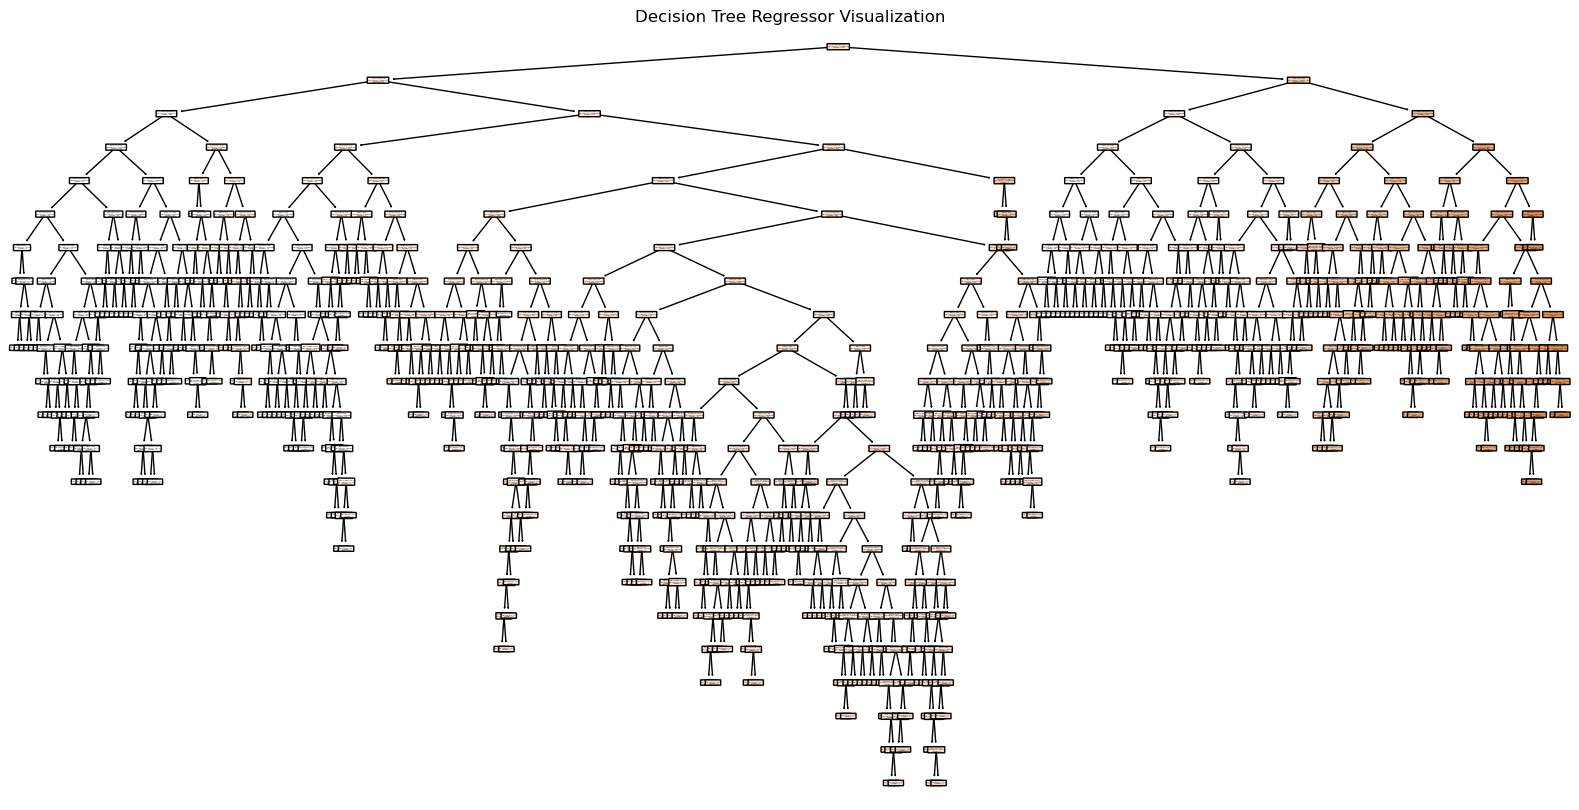

In [285]:
feature_names = X.columns.tolist()  # Extract feature names

# Assuming 'regressor' is your trained Decision Tree Regressor
plt.figure(figsize=(20, 10))  # Adjust the size as needed
plot_tree(regressor, filled=True, feature_names=feature_names, rounded=True)
plt.title("Decision Tree Regressor Visualization")
plt.show()

#### Decision Tree Analysis.

This is a very complex decision tree that is not only too complicated to interpret but it is also prone to overfitting capturing noise instead of patterns. Which means that it may not capture the trends and may not prove to be a reliable model for making predictions for the test or unseen data. The R-Squared value is high (99.38%) which shows that it is a very good fit. But it could also sometimes be the result of overfitting, something that can happen in decision trees.  The relatively high errors (especially RMSE, which is 100.16) mean that the model is not very good at predicting the test data. In other words, it might struggle to accurately predict the loyalty score. The model can be improved and simplified by selecting relevant features and tuning hyperparameters. I will check the importance of various features (variables) and drop the unnecessary ones. I will also prune the tree by reducing the maximum depth. Simplifying the model through pruning and focusing on key features will yield more actionable and generalizable business strategies.


### 2.5. Check the importance of features that may contribute to loyalty and Build a new model

       Feature  Importance
1       salary    0.497461
2     spending    0.483538
0          age    0.016813
3    education    0.001403
4      product    0.000624
5  gender_Male    0.000161


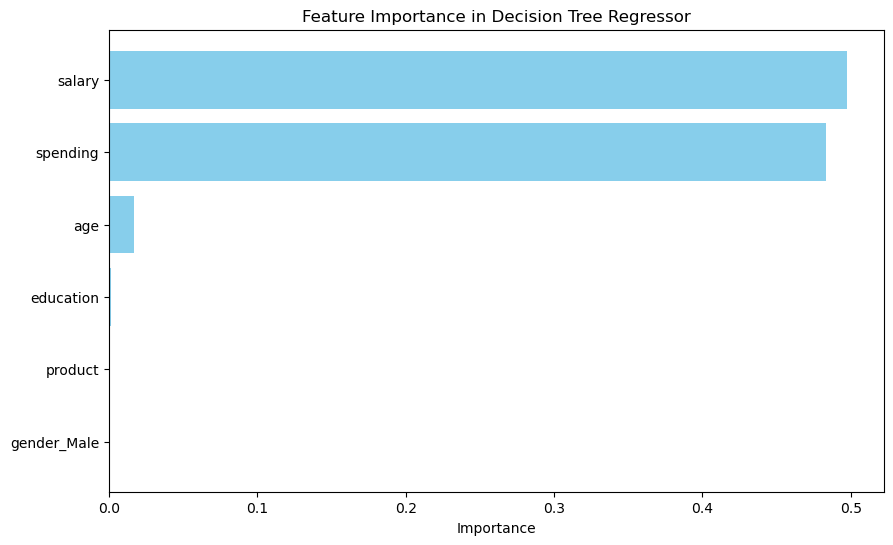

In [398]:
# Get the feature importances
feature_importances = regressor.feature_importances_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print(features_df)

# Plot feature importances for a visual view
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Decision Tree Regressor')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


The visualisation shows that 'spending' and 'salary' have the most impact while 'age' has some impact on loyalty. Therefore, I will fit the decision tree regressor model on two different X data combinations and validate the accuracy of the model by checking the MAE, MSE RMSE before fitting the trained model on the test data. 

#### Model 2

To improve the accuracy, a new model will be built with spending and salary as the independent variables because they have the most impact on loyalty. Pruning will also be applied.

In [400]:
# Drop 'loyalty', 'review', and 'summary', product, age, gender and education columns for X (independent variables)
X = df2.drop(columns=['loyalty', 'review', 'summary', 'product', 'gender_Male', 'education', 'age'])

# Specify that the column loyalty should be moved into a separate DataFrame.
y = df2['loyalty']

print(X)
print(y)

      salary  spending
0      12.30        39
1      12.30        81
2      13.12         6
3      13.12        77
4      13.94        40
...      ...       ...
1995   84.46        69
1996   92.66         8
1997   92.66        91
1998   98.40        16
1999   92.66         8

[2000 rows x 2 columns]
0        210
1        524
2         40
3        562
4        366
        ... 
1995    4031
1996     539
1997    5614
1998    1048
1999     479
Name: loyalty, Length: 2000, dtype: int64


In [402]:
# Split the data training and testing 30/70.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

# Import the 'DecisionTreeRegressor' class from sklearn.
from sklearn.tree import DecisionTreeRegressor  

# Create the 'DecisionTreeRegressor' class 
regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor object to the data set.
regressor.fit(X_train,y_train)  

DecisionTreeRegressor(random_state=42)

In [404]:
# Predict the response for the data test.
y_predict = regressor.predict(X_test)  

# Specify to print the MAE and MSE (to evaluate the accuracy of the new model).
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_predict))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_predict))
# Calculate the RMSE.
print("Root Mean Squared Error: ", 
     math.sqrt(metrics.mean_squared_error(y_test, y_predict)))  

# Use the model's score method to calculate R²
r2_model = regressor.score(X_test, y_test)
print(f"R-squared (R²) value using model's score: {r2_model:.4f}")

Mean Absolute Error:  83.27339035039036
Mean Squared Error:  26097.98366433656
Root Mean Squared Error:  161.54870369129105
R-squared (R²) value using model's score: 0.9839


#### Model 3

The Model 2's R-Squared value has decreased slighlty from 0.9938 to 0.9839. The values of MAE and RMSE have increased significantly from 38 to 83 and from 100 to 161, respectively. These values are higher than the first model which means that the average predictions of the second model is off by 83 units as comp[ared to the first model whose average predictions are off by 33 units. For comparison, I will create another model with X data comprising of spending, salary and age variables. 

In [441]:
# Drop 'loyalty', 'review', and 'summary' columns for X (independent variables)
X = df2.drop(columns=['loyalty', 'review', 'summary', 'product', 'gender_Male', 'education'])

# Specify that the column loyalty should be moved into a separate DataFrame.
y = df2['loyalty']

print(X)          
print(y)

      age  salary  spending
0      18   12.30        39
1      23   12.30        81
2      22   13.12         6
3      25   13.12        77
4      33   13.94        40
...   ...     ...       ...
1995   37   84.46        69
1996   43   92.66         8
1997   34   92.66        91
1998   34   98.40        16
1999   32   92.66         8

[2000 rows x 3 columns]
0        210
1        524
2         40
3        562
4        366
        ... 
1995    4031
1996     539
1997    5614
1998    1048
1999     479
Name: loyalty, Length: 2000, dtype: int64


In [443]:
# Split the data training and testing 30/70.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

# Import the 'DecisionTreeRegressor' class from sklearn.
from sklearn.tree import DecisionTreeRegressor  

# Create the 'DecisionTreeRegressor' class 
regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor object to the data set.
regressor.fit(X_train,y_train)  

DecisionTreeRegressor(random_state=42)

In [445]:
# Predict the response for the data test.
y_predict = regressor.predict(X_test)  

# Specify to print the MAE and MSE (to evaluate the accuracy of the new model).
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_predict))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_predict))
# Calculate the RMSE.
print("Root Mean Squared Error: ", 
     math.sqrt(metrics.mean_squared_error(y_test, y_predict)))  

# Use the model's score method to calculates R²
r2_model = regressor.score(X_test, y_test)
print(f"R-squared (R²) value using model's score: {r2_model:.4f}")

Mean Absolute Error:  26.175
Mean Squared Error:  6390.525
Root Mean Squared Error:  79.94075931588341
R-squared (R²) value using model's score: 0.9961


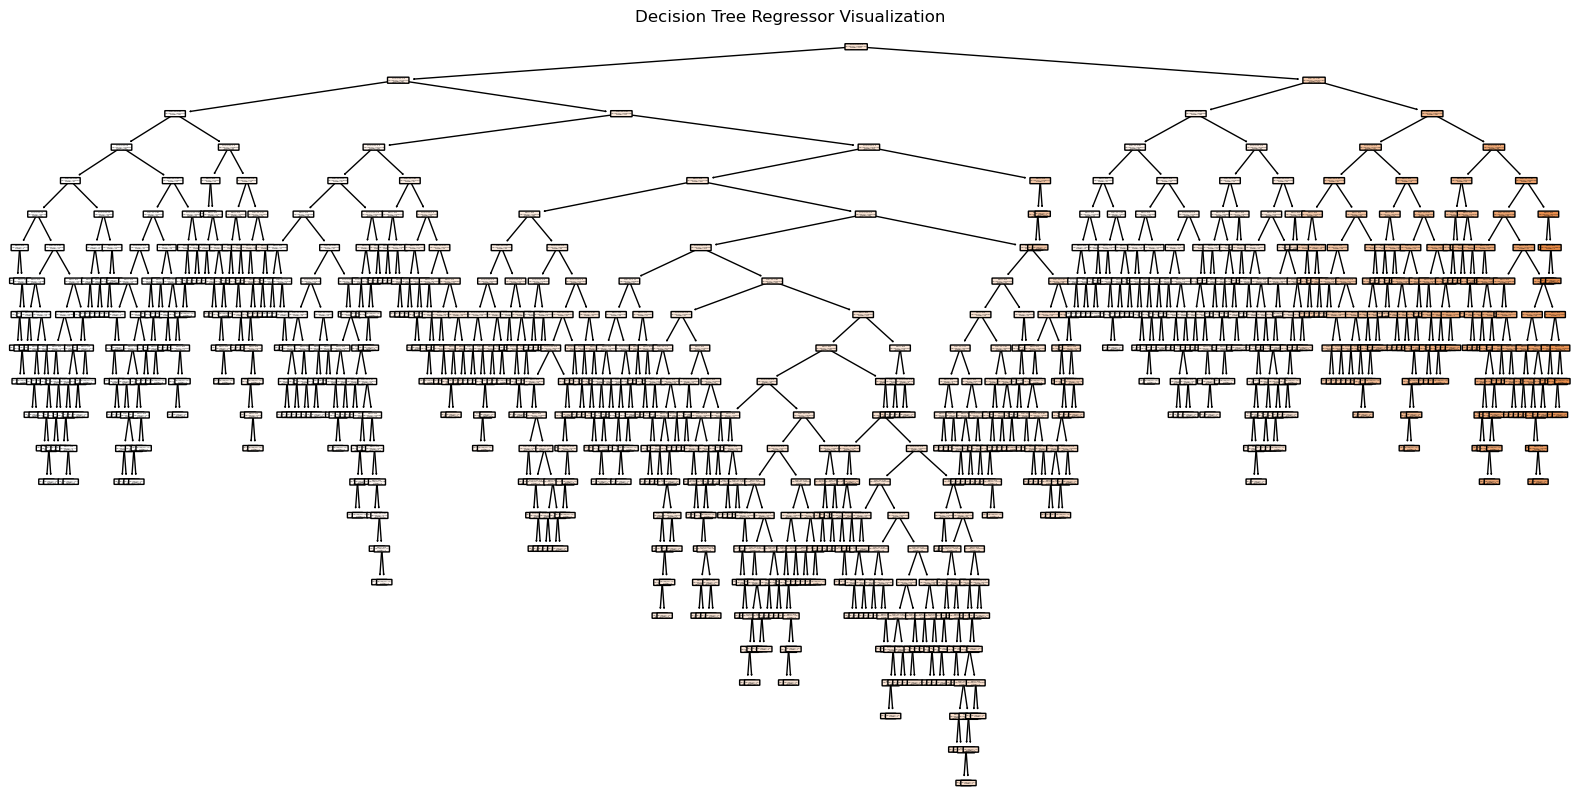

In [447]:
feature_names = X.columns.tolist()  # Extract feature names

# Assuming 'regressor' is your trained Decision Tree Regressor
plt.figure(figsize=(20, 10))  # Adjust the size as needed
plot_tree(regressor, filled=True, feature_names=feature_names, rounded=True)
plt.title("Decision Tree Regressor Visualization")
plt.show()

#### Result of the Model 3:

Model 3 seems to be the best model because it has the highest R-Sqaured value (0.9961) and lowest Mean Absilute Error (26). In other words, it's predictions on the test data will be more accurate (only 26 units off) than the other two models. Therefore, I will use this model for pruning to make the decision tree visualisation simplified and easy to interpret. 

### 2.6. Apply Pruning

By experimenting with parameters like max_depth, min_samples_split, and min_samples_leaf (Hyperparameter Tuning), the tree's complexity and overfitting could be controlled. I will start by setting the maximum depth to 4 and then 3, while keeping the minimum sample leaf and minimum sample splits to 2 each.

In [412]:
# Pruning the model using (pre-)pruning using supplied parameters
# In practice we would use a specific method such as cost complexity pruning to evaluate alternatives.
pruned_regressor = DecisionTreeRegressor(random_state=42,
                             max_depth = 4,
                             min_samples_leaf = 2,
                             min_samples_split = 2)


# Train the pruned regressor
pruned_regressor.fit(X_train, y_train)

# Make predictions
y_pred = pruned_regressor.predict(X_test)

# Evaluate the pruned model
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Use the model's score method to calculates R²
r2_model = regressor.score(X_test, y_test)
print(f"R-squared (R²) value using model's score: {r2_model:.4f}")

Mean Absolute Error: 215.35861879797181
Mean Squared Error: 91766.39848457077
Root Mean Squared Error: 302.929692312541
R-squared (R²) value using model's score: 0.9961


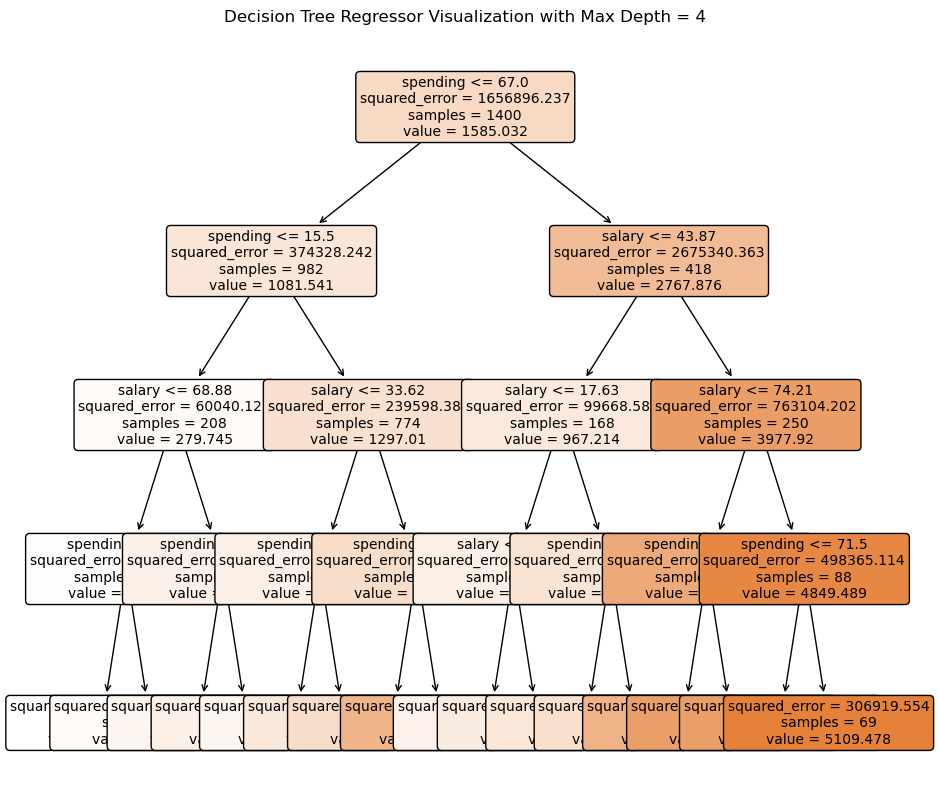

In [414]:
import matplotlib.pyplot as plt
from sklearn import tree

# Plot final model
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the decision tree
tree.plot_tree(pruned_regressor, fontsize=10, filled=True, rounded=True, feature_names=feature_names)
plt.title("Decision Tree Regressor Visualization with Max Depth = 4")
# Show the plot
plt.show()

### 2.7. Plotting the Final Tree

In [426]:
# Pruning the model using (pre-)pruning using supplied parameters
# In practice we would use a specific method such as cost complexity pruning to evaluate alternatives.
pruned_regressor = DecisionTreeRegressor(random_state=42,
                             max_depth = 3,
                             min_samples_leaf = 2,
                             min_samples_split = 2)


# Train the pruned regressor
pruned_regressor.fit(X_train, y_train)

# Make predictions
y_pred = pruned_regressor.predict(X_test)

# Evaluate the pruned model
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Use the model's score method to calculates R²
r2_model = regressor.score(X_test, y_test)
print(f"R-squared (R²) value using model's score: {r2_model:.4f}")

Mean Absolute Error: 267.1299251233641
Mean Squared Error: 137962.67325147352
Root Mean Squared Error: 371.4332689077185
R-squared (R²) value using model's score: 0.9961


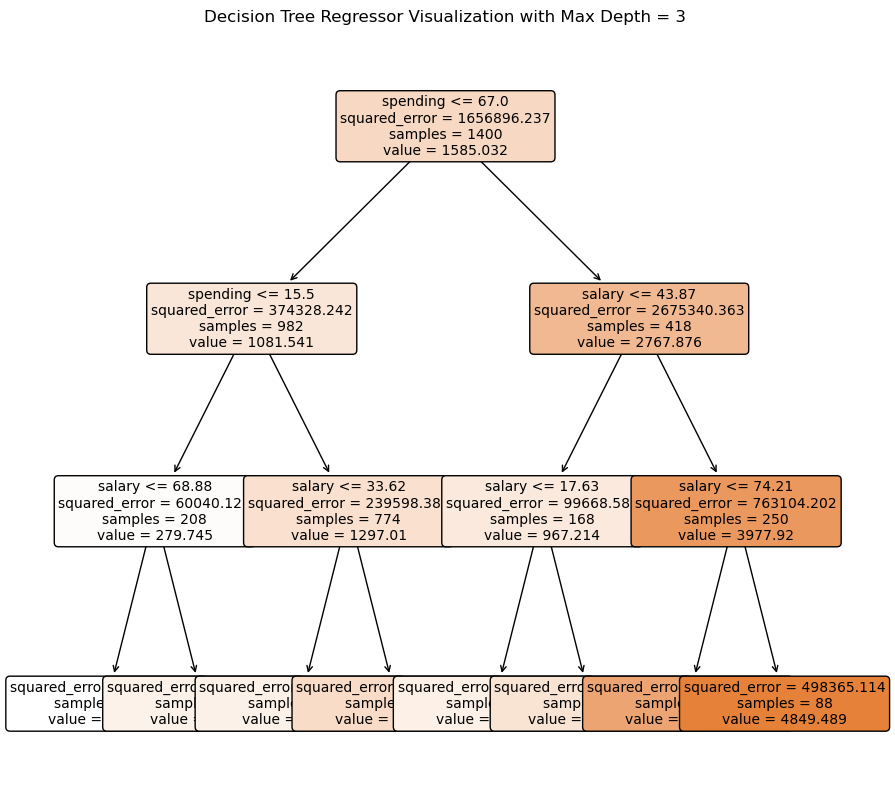

In [428]:
import matplotlib.pyplot as plt
from sklearn import tree

# Plot final model
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the decision tree
tree.plot_tree(pruned_regressor, fontsize=10, filled=True, rounded=True, feature_names=feature_names)
plt.title("Decision Tree Regressor Visualization with Max Depth = 3")
# Show the plot
plt.show()

### 2.8. Observations & Recommendations:

- After applying pruning and setting the maximum depth to 4 and then 3, the tree with the maximum depth of 3 seems like a better model in terms of interpretability and simplicity but with the risk of increasing mean absolute error and potential underfitting. Which means that it may not capture enough details or trends in the data.
- There is no change in the R-Squared value (0.9961). However, the value of MAE increases by pruning. It increased from 26 to 267, which means that the average predictions of the pruned model will be off by 267 units than the pre pruned model. However, this model can be adopted for the simplicity of interpretation.  
- The decision tree provides clear insights in to the relationship between spending and salary. The tree root node splits at 'spending <= 67.0' which shows that spending is the most important feature in reducing variance or error. At the second depth, subsequent splits happen based on 'salary <= 68.88', which shows that salary and spending both have the most impact on customer loyalty. 
- To investigate how salary influences customer spending behaviour, customer segmentation should be performed. This could reveal how much or how less do the customers belonging to different income brackets spend at Turtle Games. The result of this segmentation can then be used by the company for targeted marketing by adjusting their products' price or offering discount vouchers to customers, as an example.
 

# 3. Clustering with k-means using Python

Turtle Games’s marketing department would like to know if and how remuneration and spending scores can be used to better understand and describe customer behaviour. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use k-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

### Instructions

- Import the necessary libraries, and prepare the data for clustering. 
- Import the CSV file you prepared in Module 2.
- Create a new DataFrame (e.g. df3) containing the remuneration and spending_score columns.
- Explore the new DataFrame.
- Plot the remuneration versus spending score to determine any correlations and possible groups (clusters). (Hint: You can use a scatterplot and pairplot.)
- Use the Silhouette and Elbow methods to determine the optimal number of clusters for k-means clustering.
- Plot both methods, and explain how you determine the number of clusters to use.
- Add titles and legends to the plot.
- Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhouette methods.
- Plot the predicted k-means.
- Explain which value might give you the best clustering.
- Fit a final model using your selected value for k.
- Justify your selection, and comment on the respective cluster sizes of your final solution.
- Check the number of observations per predicted class.
- Plot the clusters and interpret the model. Make sure to document your  observations and interpretations of the output that will serve as input to your business and technical feedback at the end of the course.
- Make sure to: describe the groups identified, comment on the relative sizes of the groups, suggest specific actions per group or suggest groups that should be targeted.


## 3.1. Import Necessary Libraries, Load and Explore Data

In [491]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [493]:
# Import the CSV file from Assignment 2
df = pd.read_csv('clean_reviews.csv')

# Read and sense check the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     2000 non-null   object 
 1   age        2000 non-null   int64  
 2   salary     2000 non-null   float64
 3   spending   2000 non-null   int64  
 4   loyalty    2000 non-null   int64  
 5   education  2000 non-null   object 
 6   product    2000 non-null   int64  
 7   review     2000 non-null   object 
 8   summary    2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 3.2. Prepare the data

In [495]:
# Create a new DataFrame with Salary and Spending columns.
df3 = df.drop(columns=['gender','age', 'loyalty', \
                       'education', 'product', 'review', 'summary'])

# Display column names and their statistical summary.
print(df3.columns)
df3.describe()

Index(['salary', 'spending'], dtype='object')


salary     spending
count  2000.000000  2000.000000
mean     48.079060    50.000000
std      23.123984    26.094702
min      12.300000     1.000000
25%      30.340000    32.000000
50%      47.150000    50.000000
75%      63.960000    73.000000
max     112.340000    99.000000

The statistical summary of 'salary' and 'spending' shows a variation of data between 12.3 and 112.34 and 1 and 99 respectively.

## 3.3. Visualise the data

### 3.3.1. Scatterplot

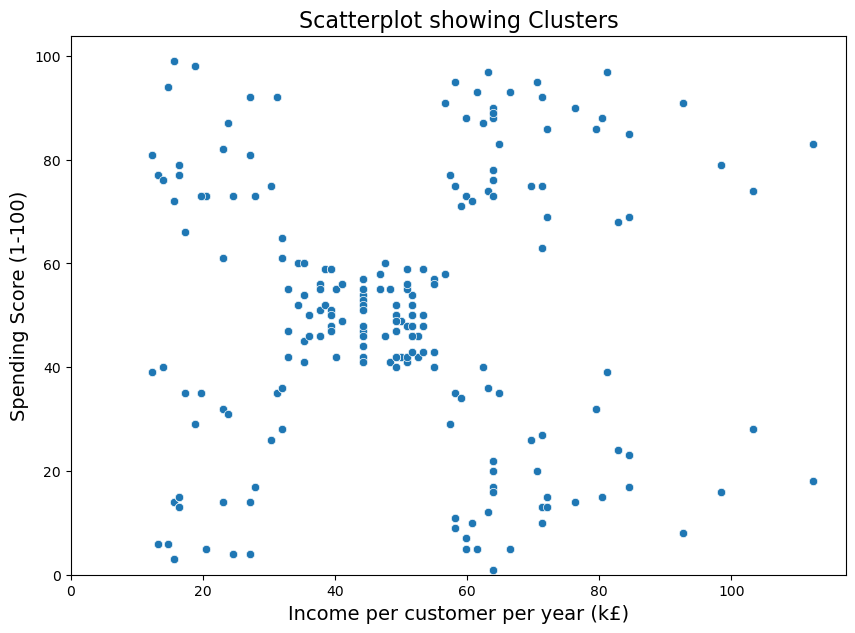

<Figure size 1500x1000 with 0 Axes>

In [510]:
# Set the size of the figure
plt.figure(figsize=(10, 7))  

# Create a scatterplot with Seaborn.
sns.scatterplot(x='salary',
                y='spending',
                data=df3)
              

# Set the title and labels 
plt.title('Scatterplot showing Clusters', fontsize=16)
plt.xlim(0)  
plt.ylim(0)  
plt.xlabel('Income per customer per year (k£)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)

# Show the plot.
plt.show()  

# Save the figure to a file.
plt.savefig('clusters_scatter.png', bbox_inches='tight')  

### 3.3.2. Pairplot

<Figure size 1000x700 with 0 Axes>

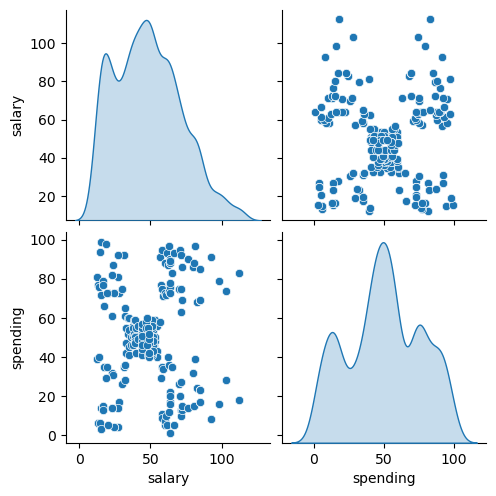

<Figure size 1500x1000 with 0 Axes>

In [522]:
# Set the size of the figure
plt.figure(figsize=(10, 7))  

# Create a pairplot with Seaborn.
x = df3[['salary', 'spending']]

sns.pairplot(df3,
             vars=x,
             diag_kind='kde')
 

# Show the plot.
plt.show()  

# Save the figure to a file.
plt.savefig('clusters_pairplot.png', bbox_inches='tight')  

The scatterplot shows a dense cluster of data points in the centre of the plot and a sprinkling of less densely populated data points in the top and bottom left and right corners of the plot, suggestive of roughly 5 clusters. The pairplot and scatterplot both show that there is a clear correlation between salary and spending. In other words, the higher the salary of a customer, the higher their spending.

It will be useful to conduct Elbow and Silhouette Methpd to determine the optimal number of clusters for customer segmentation.

### 3.3.3. Standardise the data and then create the Pairplot again.

In [ ]:
# Create an instance of StandardScaler
#scaler = StandardScaler()

# Standardize the 'salary' and 'spending' columns
#df3[['salary', 'spending']] = scaler.fit_transform(df3[['salary', 'spending']])


# Now 'salary' and 'spending' columns in df3 are standardized
#print(df3.head())  # To see the standardized data
#df3.describe()

I initially standardised the data to convert the values between 0 and 1. There was no change in the pairplot after standardisation. Moreover, the graphs were digfficult for me to interpret. Hence, I decided to use the data without standardising.

## 3.4. Use the Elbow & Silhouette Methods

### 3.4.1.  Elbow Method

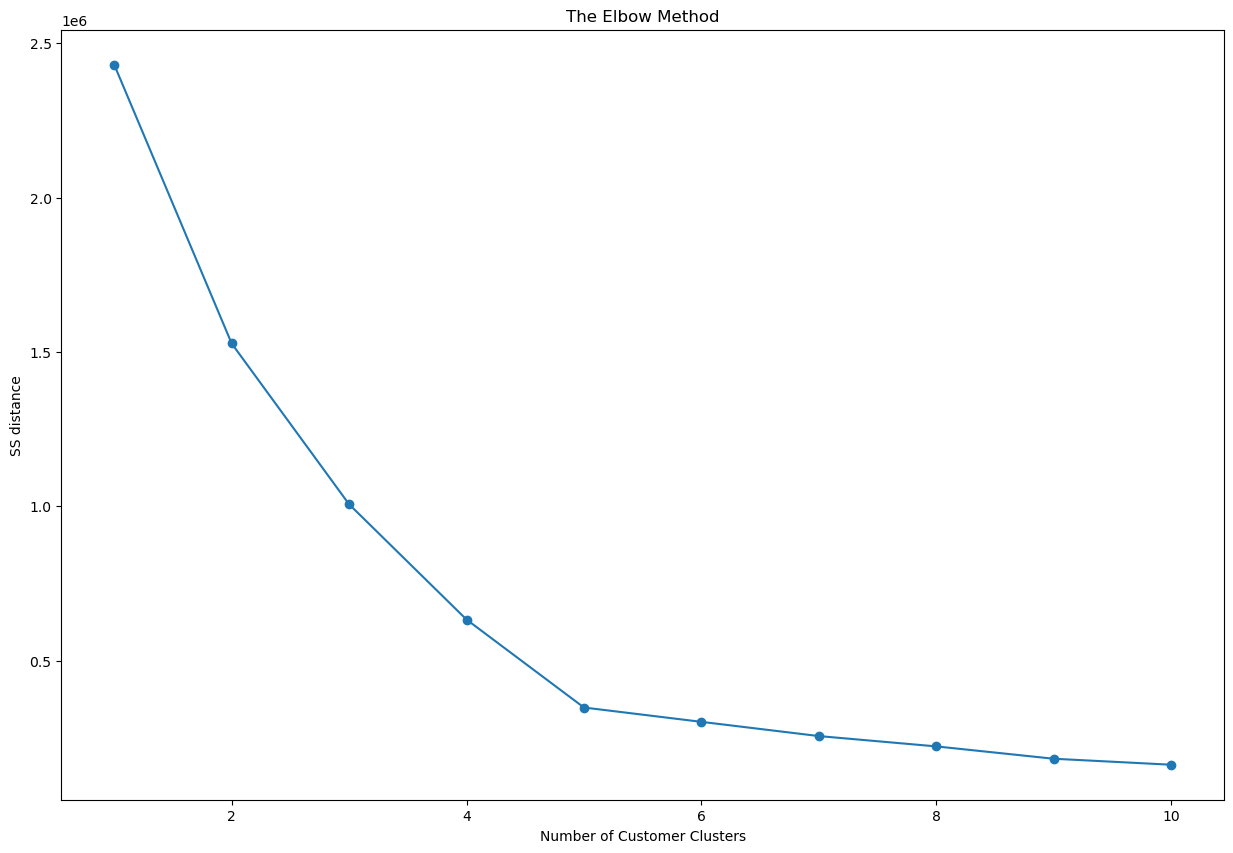

In [536]:
# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of Customer Clusters")
plt.ylabel("SS distance")

plt.show()

### 3.4.1. Silhouette Method

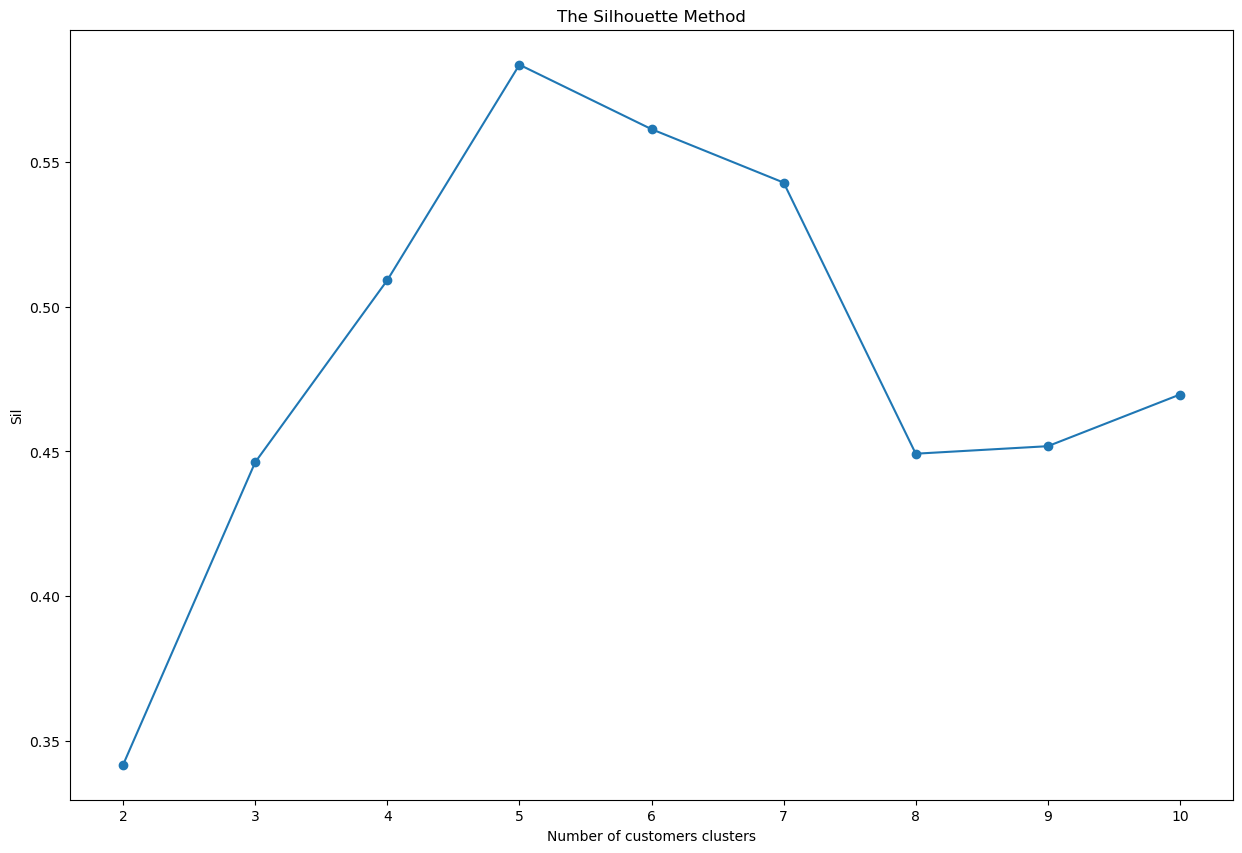

In [549]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k, random_state=0).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of customers clusters")
plt.ylabel("Sil")

plt.show()

The elbow method graph helps determine the number of k-clusters for the dataset by calculating the WSS (Within the Sum of Squares) value. The plot creates an elbow-like feature and we have to look for a point where the graph starts to dip or shows a decrease in WSS value. The elbow plot above shows that there is a sharp decrease in WSS value from 2 to 5 and then it starts to level off from 6 to 8.

The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation). The range of the Silhouette value is between +1 and -1. A high value close to +1 is desirable and indicates that the point is placed in the correct cluster and represented as a peak in the plot. In the silhouette method graph above, 5 clusters seem to have the highest score, suggesting that the dataset could likely have 5 clusters.

I will consider 4, 5 and 6 cluster solutions and produce pairplots for each solution to see how they compare.

## 3.5. Evaluate and Compare Different values for K.

### 3.5.1. Evaluate and fit the model with k=4

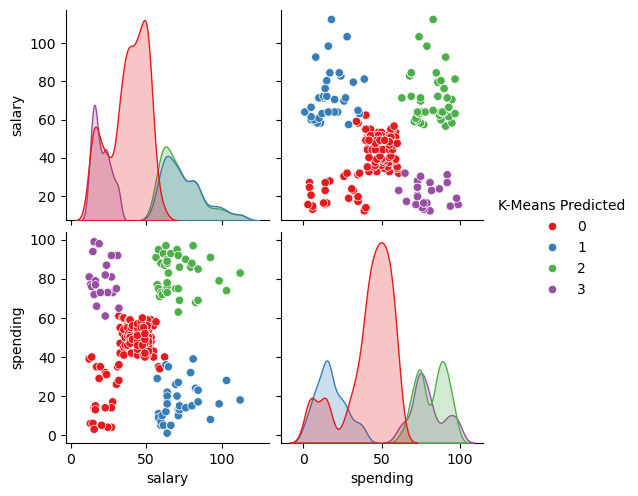

In [560]:
# Use four clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde',
             palette='Set1')

### 3.5.2. Evaluate and fit the model with k=6

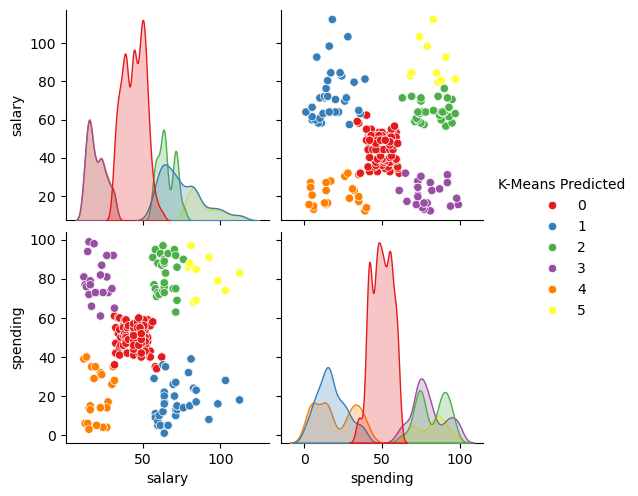

In [565]:
# Use six clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde',
            palette='Set1')

### 3.5.3. Evaluate and fit the model with k=5

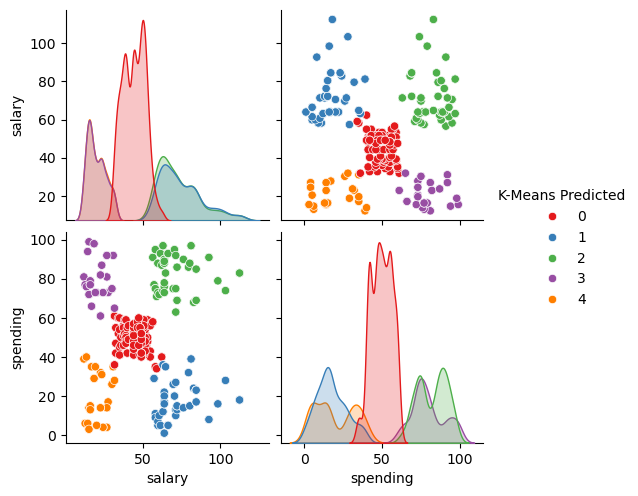

In [570]:
# Use fiveclusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde',
             palette='Set1')

## 3.6. Fit the Final Model and Justify your choice

The final model is the one with 5 clusters.

### 3.6.1. Evaluate and fit the model with k=5

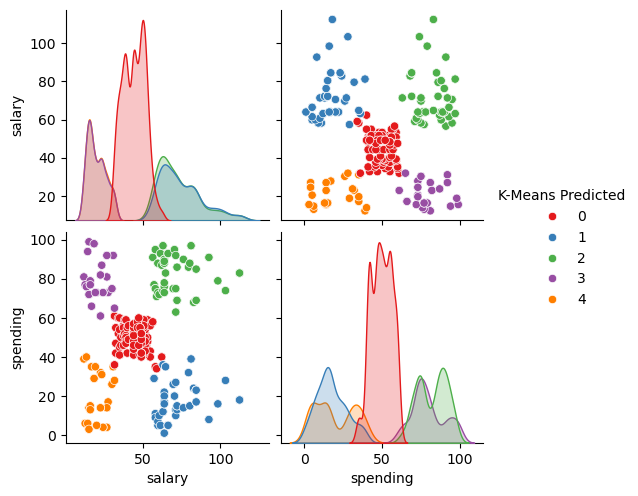

In [575]:
# Use fiveclusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde',
             palette='Set1')

In [578]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
0    774
2    356
1    330
4    271
3    269
Name: count, dtype: int64

### 3.6.2. Visualise the Clusters

In [583]:
# View the K-Means predicted.
print(x.head(15))

    salary  spending  K-Means Predicted
0    12.30        39                  4
1    12.30        81                  3
2    13.12         6                  4
3    13.12        77                  3
4    13.94        40                  4
5    13.94        76                  3
6    14.76         6                  4
7    14.76        94                  3
8    15.58         3                  4
9    15.58        72                  3
10   15.58        14                  4
11   15.58        99                  3
12   16.40        15                  4
13   16.40        77                  3
14   16.40        13                  4


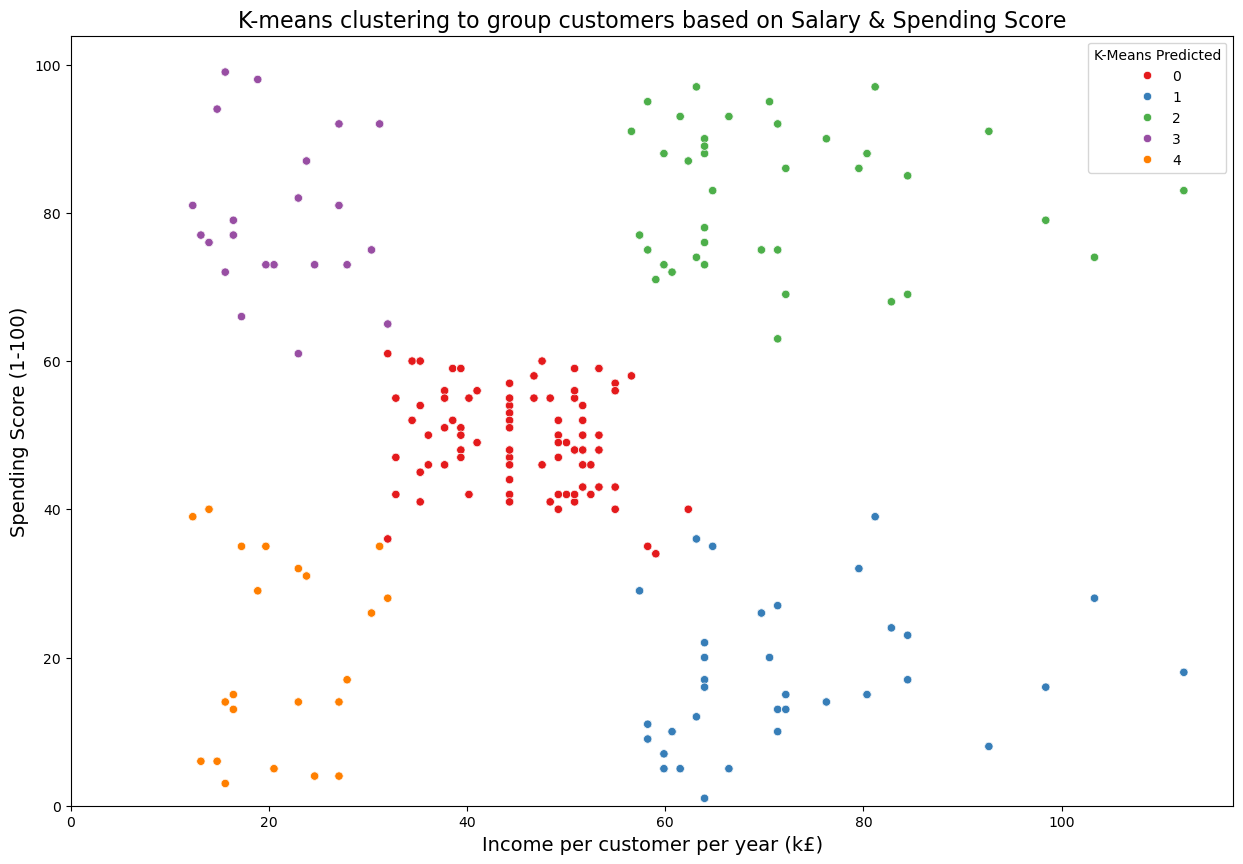

<Figure size 1500x1000 with 0 Axes>

In [586]:
# Create a scatterplot for better visualisation.
scatter_plot = sns.scatterplot(
    x='salary',
    y='spending',
    data=x,
    hue='K-Means Predicted',
    palette='Set1')  

# Set plot title and labels.
scatter_plot.set_title('K-means clustering to group customers based on Salary & Spending Score', fontsize=16)
plt.xlim(0)  
plt.ylim(0)  
plt.xlabel('Income per customer per year (k£)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)

# Show the plot.
plt.show()  

# Save the figure to a file.
plt.savefig('5_clusters.png', bbox_inches='tight')  

## 3.7. Insights & Recommendations:

- The final model is the one with 5 clusters as the Elbow and Silhouette Methods graphs show 5 distinct hard clusters with no overlapping data points. The scatterplot and the pairplot confirm the above observation as well. For the purpose of customer segmentation, we can confidently group customers in 5 clusters or categories based on their spending score and salary.
- The data has 2000 customers details entries. Cluster 0 has the highest number of entries (774). The rest of the  clusters are evenly distribution ranging between 269 - 356.
- When the first 15 values of the dataframe are visualised, the salary and spending for different clusters match the scatterplot depiction. For example the K-Means model predicts the customer at index 0 to belong to cluster 4, which belongs customer with a low income and low spend. When we view the scatterplot, this observation is confirmed. 

**The 5 Clusters:**

- Cluster 0 (Red) belongs to customers with moderate income (30-60K£) and moderate spending score (30 - 60). They represent average shoppers who like to spend within their means.
- Cluster 1 (Blue) belongs customers with high income bracket (60-100K£) and low spending score (10-40). These customers should be engaged with offers.
- Cluster 2 (Green) belongs to high earners (60-100K£) with high spending score (Over 100). These customers should be offered premium offers.
- Cluster 3 (Purple) belongs low earners (20-40K£) with high spending score (60 -100). These are loyal customers who are perhaps keen to buy certain products.
- Cluster 4 (Yellow) belongs to customers with low income (20-40K£) and low spending score (Below 40). These customers are restricted by budget limitations.


**Recommendations to Turtle Games Marketing Team:**

This customer segmentation information can be very useful for Turtle Games in increasing their sales by targetting the different types of customers. Customers in cluster 1 (high earners, low spending) can be offered incentives and promotions to increase their spending score. Those in cluster 2 (high earners, high spending) can be targetted with premium offers to attract more custom. Similarly, customers with moderate spending and low/ moderate incomes could be engaged with loyalty programs or offered products discounts.

# 4. Analysing customer sentiments with reviews

## Scenario

Customer reviews were downloaded from Turtle Games’s website. The marketing team faces a challenge with the quality and utility of this data type. As a data analyst, you need to explore and demonstrate the potential value of text analytics. Effectively analysing this data can provide the marketing department with key insights, shaping and informing future campaigns; but the organisation is unsure about how to deal with ‘lower-quality’ data. You’ve been tasked with demonstrating how the techniques can be applied to the available data set in order to help the organisation commit further resources to improving data collection practices and potentially acquiring additional sources

## Objective
- Identify the 15 most common words used in online product reviews.
- Identify the top 20 positive reviews and the top 20 negative reviews received from the websit.
- Make suggestions for future improvements in data collection and analysis of text data.

## Instructions

- Load and explore the data.
- Sense-check the DataFrame.
- You only need to retain the review and summary columns.
- Determine if there are any missing values.
- Prepare the data for NLP
- Change to lower case and join the elements in each of the columns respectively (review and summary).
- Replace punctuation in each of the columns respectively (review and summary).
- Drop duplicates in both columns (review and summary).
- Tokenise and create wordclouds for the respective columns (separately).
- Create a copy of the DataFrame.
- Apply tokenisation on both columns.
- Create and plot a wordcloud image.
- Frequency distribution and polarity.
- Create frequency distribution.
- Remove alphanumeric characters and stopwords.
- Create wordcloud without stopwords.
- Identify 15 most common words and polarity.
- Review polarity and sentiment.
- Plot histograms of polarity (use 15 bins) for both columns.
- Review the sentiment scores for the respective columns.
- Identify and print the top 20 positive and negative reviews and summaries respectively.
- Include your insights and observations.

## 4.1.  Load the necessary libraries and explore the data

Import all the necessary libraries like pandas, numpy, matplotlib and nltk (Natural Language Toolkit), a powerful library that works with Natural Language Processing (NLP) to perform tokenisation, stemming, lemmatization and parts of speech tagging, etc., to help in text analysis. It also includes corpora (large datasets of text).

In [607]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   -- ------------------------------------ 20.5/301.4 kB 330.3 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/301.4 kB 787.7 kB/s eta 0:00:01
   ---------------------------------------  297.0/301.4 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 2.3 MB/s eta 0:00:00


In [611]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - ------------------------------------- 20.5/626.3 kB 640.0 kB/s eta 0:00:01
   ----- ---------------------------------- 92.2/626.3 kB 1.3 MB/s eta 0:00:01
   ----------------------- ---------------- 368.6/626.3 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 3.9 MB/s eta 0:00:00


In [655]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [620]:
# Import the CSV file from Assignment 3
df = pd.read_csv('clean_reviews.csv')

# Read and sense check the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     2000 non-null   object 
 1   age        2000 non-null   int64  
 2   salary     2000 non-null   float64
 3   spending   2000 non-null   int64  
 4   loyalty    2000 non-null   int64  
 5   education  2000 non-null   object 
 6   product    2000 non-null   int64  
 7   review     2000 non-null   object 
 8   summary    2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 4.2. Prepare the Data

In [632]:
# Create a new DataFrame with Review and Summary columns.
new_df = df.drop(columns=['gender','age', 'loyalty', \
                       'education', 'product', 'spending', 'salary'])

# Display column names and their statistical summary.
print(new_df.columns)
print(new_df.shape)
new_df.head()

Index(['review', 'summary'], dtype='object')
(2000, 2)


review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [635]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [638]:
# Check for missing values.
df_null = new_df[new_df.isna().any(axis=1)]


# Print to check if there are missing values.
df_null.shape

(0, 2)

## 4.3.  Pre-process the Data for Natural Language Processing

### 4.3.1. Check for and drop Duplicates in both columns.

In [643]:
# Check the number of duplicates.
print("Number of duplicate records in the dataframe are:",new_df.duplicated().sum())

Number of duplicate records in the dataframe are: 18


In [688]:
# Drop duplicates based on 'review' and 'summary' columns.
df4 = new_df.drop_duplicates(subset=['review', 'summary'])

# Preview data.
df4.reset_index(inplace=True)
df4.shape

(1982, 3)

The data comes from 'turtle_reviews.csv', the original file that was cleaned and renamed 'clean_reviews.csv' before performing predictive analysis. It has 9 columns. But for the purpose of sentiment analysis, all the irrelevant columns, except 'summary' and 'review' have been removed, using drop() function. It has 2000 rows. There are no null values. There were 18 duplicate values found in the data which were removed.

### 4.3.2. Remove Punctuation, convert to Lowercase and Tokenise.


In [694]:
# Transform review column to lowercase.
df4['review'] = df4['review'].str.lower()

# Preview the result.
df4['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*:\n\nyour unpaint...
2    nice art, nice printing.  why two panels are f...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [697]:
# Transform summary column to lowercase.
df4['summary'] = df4['summary'].str.lower()

# Preview the result.
df4['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [700]:
# Remove punctuation from review column.
df4['review'] = df4['review'].str.replace(r'[^\w\s]', '', regex=True)

# Preview the result.
df4['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9\n\nyour unpainted...
2    nice art nice printing  why two panels are fil...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [703]:
# Remove punctuation from summary column.
df4['summary'] = df4['summary'].str.replace(r'[^\w\s]', '', regex=True)

# Preview the result.
df4['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [706]:
df4.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9\n\nyour unpainted...   
2      2  nice art nice printing  why two panels are fil...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

## 4.7. Tokenise the text in review and summary

In [711]:
# Tokenise the words in review.
df4['tokenised_review'] = df4['review'].apply(word_tokenize)

# Preview data.
df4['tokenised_review'].head()


0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokenised_review, dtype: object

In [714]:
# Tokenise the words in summary.
df4['tokenised_summary'] = df4['summary'].apply(word_tokenize)

# Preview data.
df4['tokenised_summary'].head()


0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokenised_summary, dtype: object

In [717]:
df4.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9\n\nyour unpainted...   
2      2  nice art nice printing  why two panels are fil...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                    tokenised_review  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                   tokenised_summary  
0  [the, fact, that, 50, of, this, space, is, was...  
1  [another, worthless, dungeon, masters, screen,...  
2               [pretty, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]

## 4.7. Visualise the most frequently used word by creating a word cloud for review and summary Tokens.

In [722]:
# String all the tokens together in a single variable for review column.
# Create an empty string variable.
review_tokens = []
for i in range(df4.shape[0]):
    # Add each comment.
    review_tokens = review_tokens + df4['tokenised_review'][i]



In [725]:
# Ensure all entries in the 'review' column are strings
# Convert review_tokens which is a list into a string before passing it into word_cloud_review.
review_text = ' '.join(review_tokens)

# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_review = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(review_text) 

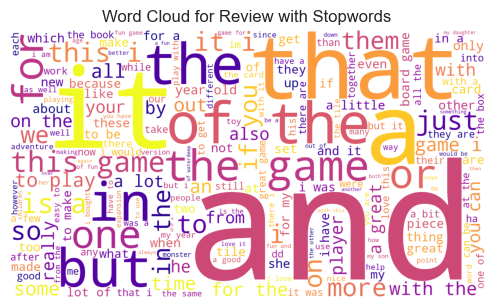

In [728]:
# Plot the WordCloud image for Review.                    
plt.figure(figsize = (14, 6), facecolor = None) 
plt.imshow(word_cloud_review) 
plt.axis('off') 
plt.tight_layout(pad = 10) 
plt.title('Word Cloud for Review with Stopwords')
plt.show()


In [731]:
# String all the tokens together in a single variable for summary column.
# Create an empty string variable.
summary_tokens = []
for i in range(df4.shape[0]):
    # Add each comment.
    summary_tokens = summary_tokens + df4['tokenised_summary'][i]


In [734]:
# Ensure all entries in the 'summary' column are strings
# Convert review_tokens which is a list into a string before passing it into word_cloud_review.
review_summary = ' '.join(summary_tokens)

# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_summary = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(review_summary) 

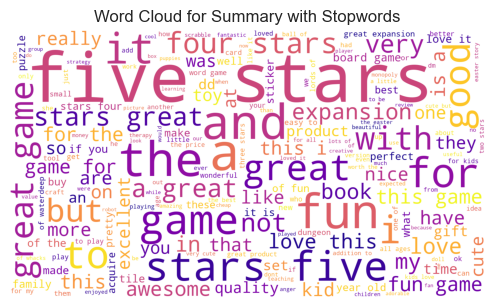

In [737]:
# Plot the WordCloud image for Review.                    
plt.figure(figsize = (14, 6), facecolor = None) 
plt.imshow(word_cloud_summary) 
plt.axis('off') 
plt.tight_layout(pad = 10) 
plt.title('Word Cloud for Summary with Stopwords')
plt.show()


The frquency distribution graphs created below and the word clouds produced above for 'review' and 'summary' reveal that the most frequently occurring words in these columns before filtering out the stopwords are 'and', 'the', 'that', 'it', 'but', 'to', 'for' and 'a'. These are stopwords which will not be useful for text analysis. Therefore, the next logical step would be to remove the stopwords and visualise the word clouds for both columns again. However, it should be noted that customer reviews summary column does have the words 'five' and stars' that are mentioned frequently as well apart from the stopwords.

## 4.7. Determine the frequency distribution and polarity
To calculate Frequency Distribution, I will have to use the Tokenised text from review and summary.

### 4.7.1. Calculate Frequency Distribution Of Review & Summary separately.

In [744]:
# Calculate the frequency distribution of Review by creating a variable,
# and passing the string of review tokens we created a few cells above.
fdist_review = FreqDist(review_tokens)

# Preview data.
fdist_review

FreqDist({'the': 5452, 'and': 3233, 'to': 3163, 'a': 3160, 'of': 2488, 'i': 2091, 'it': 2085, 'is': 1782, 'this': 1776, 'game': 1682, ...})

In [747]:
# Calculate the frequency distribution of Summary by creating a variable,
# and passing the string of summary tokens we created a few cells above.
fdist_summary= FreqDist(summary_tokens)

# Preview data.
fdist_summary

FreqDist({'stars': 448, 'five': 363, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

In [753]:
# Filter out tokens in review_tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
filtered_alpha_review = [word for word in review_tokens if word.isalnum()]

In [758]:
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
filtered_review = [x for x in filtered_alpha_review if x.lower() not in english_stopwords]

# Define an empty string variable.
edited_review = ''

for value in filtered_alpha_review:
    # Add each filtered token word to the string.
    edited_review = edited_review + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abbas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


## 4.9. Visualise the tokens of relevance in a word cloud

### 4.9.1. Create a Word Cloud for Review after removing Stopwords.

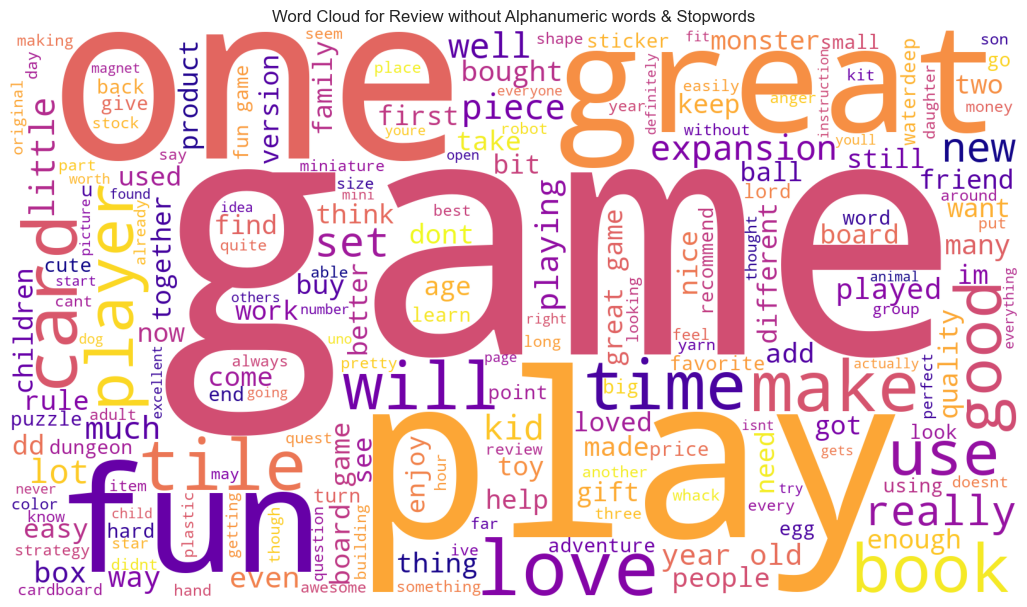

In [763]:
# Create a WordCloud for Review.
wordcloud_r = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(edited_review) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_r) 
plt.axis('off') 
#plt.tight_layout(pad = 0) 
plt.tight_layout(pad = 10) 
plt.title('Word Cloud for Review without Alphanumeric words & Stopwords')
plt.show()

### 4.9.2. Create a Word Cloud for Summary after removing Stopwords.

In [768]:
# Filter out tokens in summary_tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
filtered_alpha_summary = [word for word in summary_tokens if word.isalnum()]

In [771]:
# Download the stopword list.
#nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
filtered_summary = [x for x in filtered_alpha_summary if x.lower() not in english_stopwords]

# Define an empty string variable.
edited_summary = ''

for value in filtered_alpha_summary:
    # Add each filtered token word to the string.
    edited_summary = edited_summary + value + ' '

In [657]:
# Download the 'punkt' resource
nltk.download('punkt')


# Function to tokenize text and remove punctuation
def tokenize_text(text):
    tokens = nltk.word_tokenize(text.lower())  # Tokenize and convert to lowercase
    words = [word for word in tokens if word.isalnum()]  # Remove punctuation and keep alphanumeric words
    return words

# Step 1: Tokenize the 'review' and 'summary' columns
df4['tokenized_review'] = df4['review'].apply(tokenize_text)
df4['tokenized_summary'] = df4['summary'].apply(tokenize_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abbas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


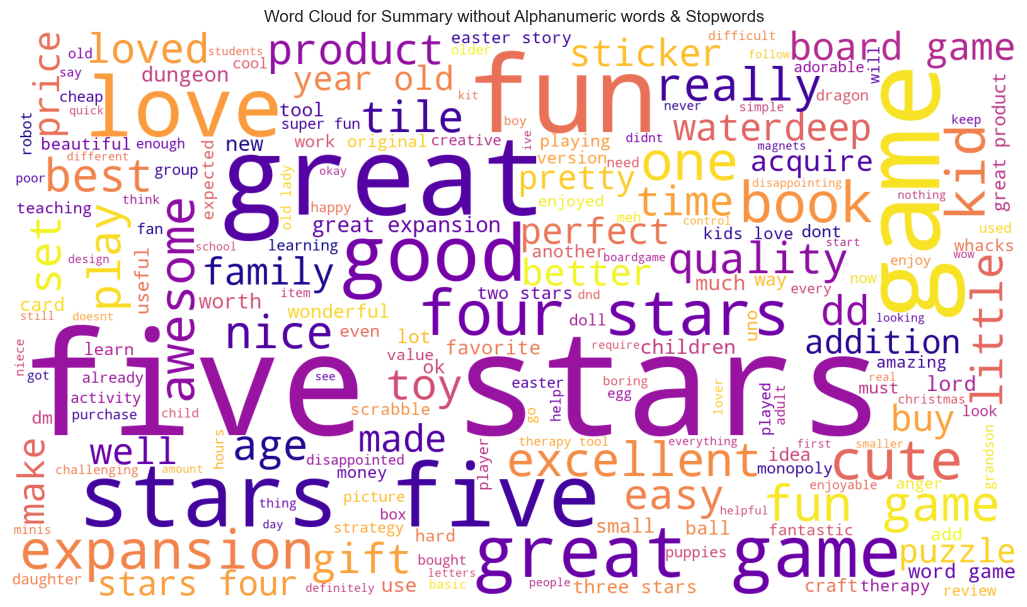

In [774]:
# Create a WordCloud.
wordcloud_s = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(edited_summary) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_s) 
plt.axis('off') 
#plt.tight_layout(pad = 0) 
plt.tight_layout(pad = 10) 
plt.title('Word Cloud for Summary without Alphanumeric words & Stopwords')
plt.show()


- After filtering out the alphanumerical words and stopwords, the most common words in both word clouds are 'fun', 'game', 'play', 'great', 'stars', ''five' and excellent, to mention a few.
- They all have positive connotations, which is indicative of positive customer reviews. In other words, it means that customers are generally happy and satisfied with the Turtle Games products. 

## 4.10. Identify the 15 most common words used, and calculate their sentiment polarity for each column. 

To identify the 15 most common words, Counter Package will be imported. To calculate sentiment polarity and subjectivity of a statement, Textblob will be imported which is a lexicon based python library.

## 4.11. Calculate Distribution Frequency, Sentiment Polarity and subjectivity of the filtered Review column.

### 4.11.1. Frequenc Distribution in Review

In [784]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(filtered_review).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
print("The frequency of the top 15 occurring words in the filtered review column are as follows: ")
counts

The frequency of the top 15 occurring words in the filtered review column are as follows: 


Frequency
Word             
game         1682
great         589
fun           553
one           530
play          502
like          414
love          325
really        319
get           319
cards         301
tiles         297
good          293
time          291
would         280
book          273

### 4.11.2. Visualisation of the 15 most frequent words identified in Customer Reviews.

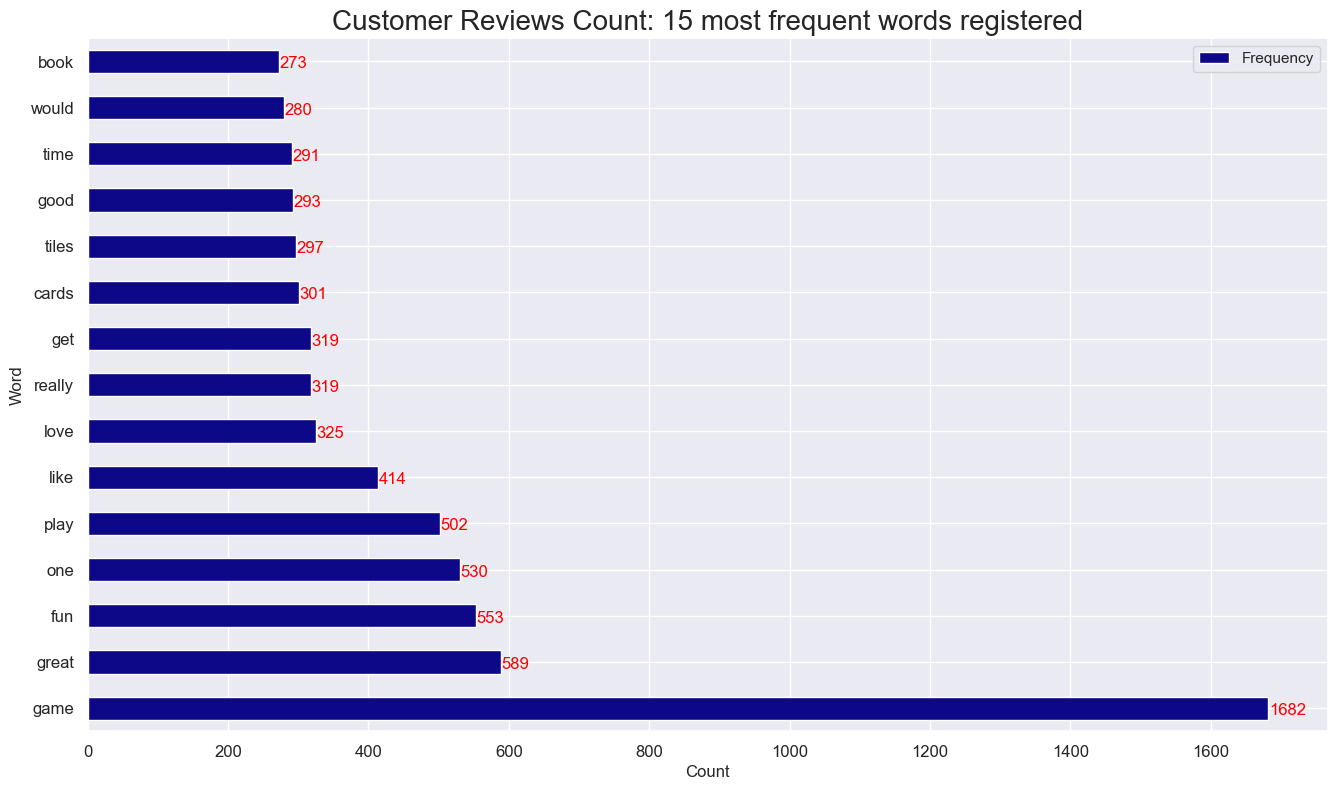

In [790]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Customer Reviews Count: 15 most frequent words registered",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

### 4.11.3. Polarity and Subjectivity of Customer Reviews

In [795]:
# Import the necessary package
from textblob import TextBlob

# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
df4['review_polarity'] = df4['review'].apply(generate_polarity)

# Preview the result.
df4['review_polarity'].head(15)

0    -0.036111
1     0.035952
2     0.116640
3     0.578788
4    -0.316667
5     0.000000
6     0.660000
7     1.000000
8     0.372222
9     0.145537
10    0.200000
11    0.000000
12    0.070000
13   -0.040909
14    0.040000
Name: review_polarity, dtype: float64

In [798]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
df4['subjectivity'] = df4['summary'].apply(generate_subjectivity)

# Preview the result.
df4['subjectivity'].head(15)

0     0.500000
1     0.900000
2     0.733333
3     0.000000
4     0.000000
5     0.000000
6     0.300000
7     0.000000
8     0.625000
9     0.000000
10    0.000000
11    0.600000
12    0.500000
13    0.606250
14    0.125000
Name: subjectivity, dtype: float64

The frequency distribution counts and the graph shows the number of times a word appears in the reviews. According to the graph, some of the most frequently used words are 'Great', 'Game', 'fun', 'one', 'like', 'love' and 'play'. These words likely reflect the positive sentiments and key aspects that customers frequently mention in their reviews.

Polarity of a statement can be measured beween 1 and -1, with 1 being the most positive, -1 being the most negative and 0 being neutral. Most values are positive with a few neutral and negative as well. Overall, it is mixed, but leaning more towards the positive polarity. Similarly, there is a mix of factual and opinionated statements as shown by the subjectivity values. A significant number of values have a score of 0 meaning they are objective. There are also some objective values above 0.7 pointing to strong opinions. There are also a few values in between suggestive of balanced statements.

### 4.11.4. Distribution Frequency, Sentiment Polarity and subjectivity of the filtered Summary column

In [805]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts_2 = pd.DataFrame(Counter(filtered_summary).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
print("The frequency of the top 15 occurring words in the filtered Summary column are as follows: ")
counts_2

The frequency of the top 15 occurring words in the filtered Summary column are as follows: 


Frequency
Word                
stars            448
five             363
game             319
great            295
fun              218
love              93
good              92
four              58
like              54
expansion         52
kids              50
cute              45
book              43
one               38
awesome           36

### 4.11.5. Visualisation of the 15 most frequent words identified in Summary of the Customer Reviews.

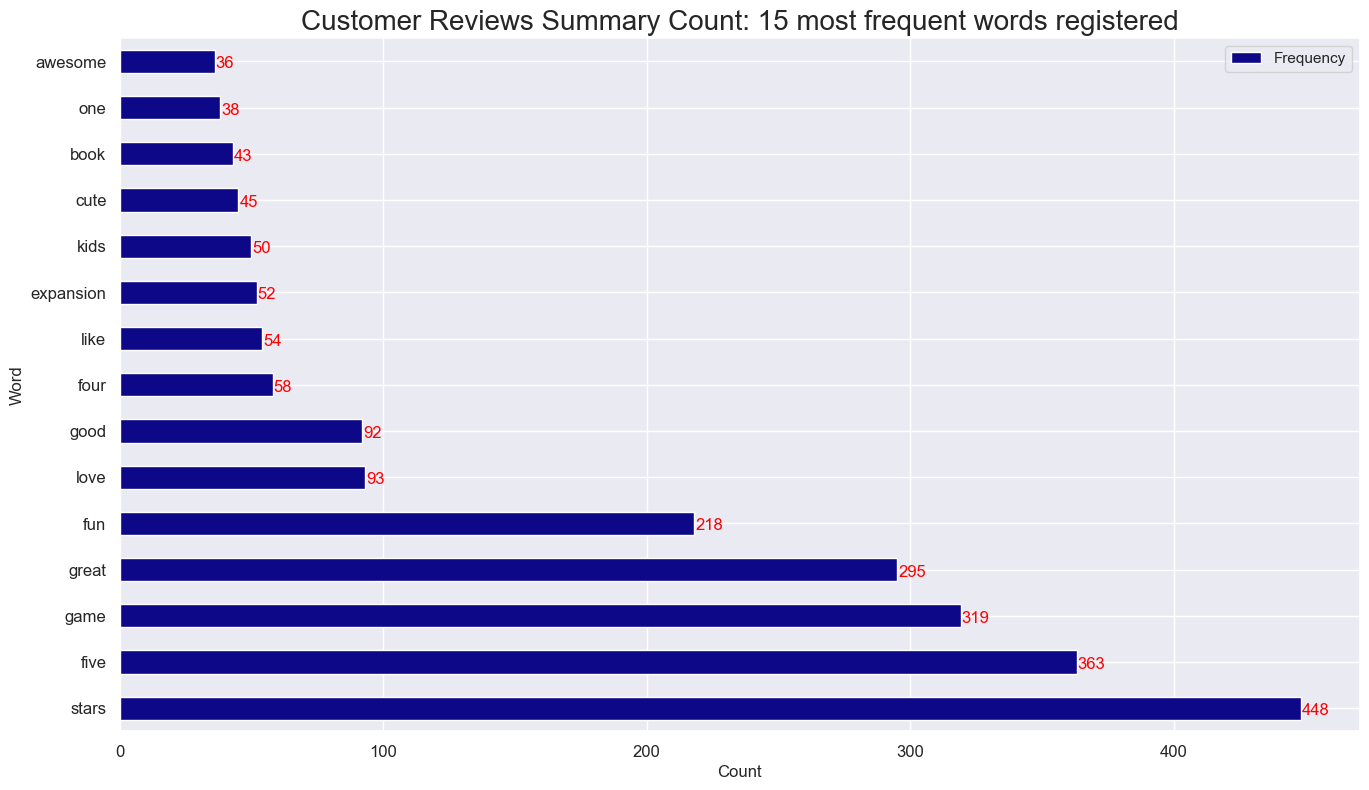

In [810]:
# Set the plot type.
ax = counts_2.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Customer Reviews Summary Count: 15 most frequent words registered",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

###  4.11.6. Polarity and Subjectivity of Customer Reviews Summary

In [815]:
# Import the necessary package
from textblob import TextBlob

# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
df4['summary_polarity'] = df4['summary'].apply(generate_polarity)

# Preview the result.
df4['summary_polarity'].head(15)

0     0.15000
1    -0.80000
2     0.00000
3     0.00000
4     0.00000
5     0.00000
6     1.00000
7     0.00000
8     0.65000
9     0.00000
10    0.00000
11    0.50000
12   -0.02500
13   -0.44375
14   -0.02500
Name: summary_polarity, dtype: float64

In [818]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
df4['subjectivity'] = df4['summary'].apply(generate_subjectivity)

# Preview the result.
df4['subjectivity'].head(15)

0     0.500000
1     0.900000
2     0.733333
3     0.000000
4     0.000000
5     0.000000
6     0.300000
7     0.000000
8     0.625000
9     0.000000
10    0.000000
11    0.600000
12    0.500000
13    0.606250
14    0.125000
Name: subjectivity, dtype: float64

According to the frequency distribution counts and the graph, some of the most frequently used words are 'Stars', 'five', 'game', 'great', 'fun' and 'love'. These words likely reflect the positive sentiments and key aspects that customers frequently mention in their reviews. . Mospolarity t values a neutral andre positive with a fnd negative as well. Overall, it is mixed, buslightly t leanine towards the positive polarity. Similarly, there is a mix of factual and opinionated statements as shown by the subjectivity valuess.

## 4.12. Visualise sentiment polarity scores on a histogram

### 4.12.1. Sentiment Polarity of Customer Review Histogram

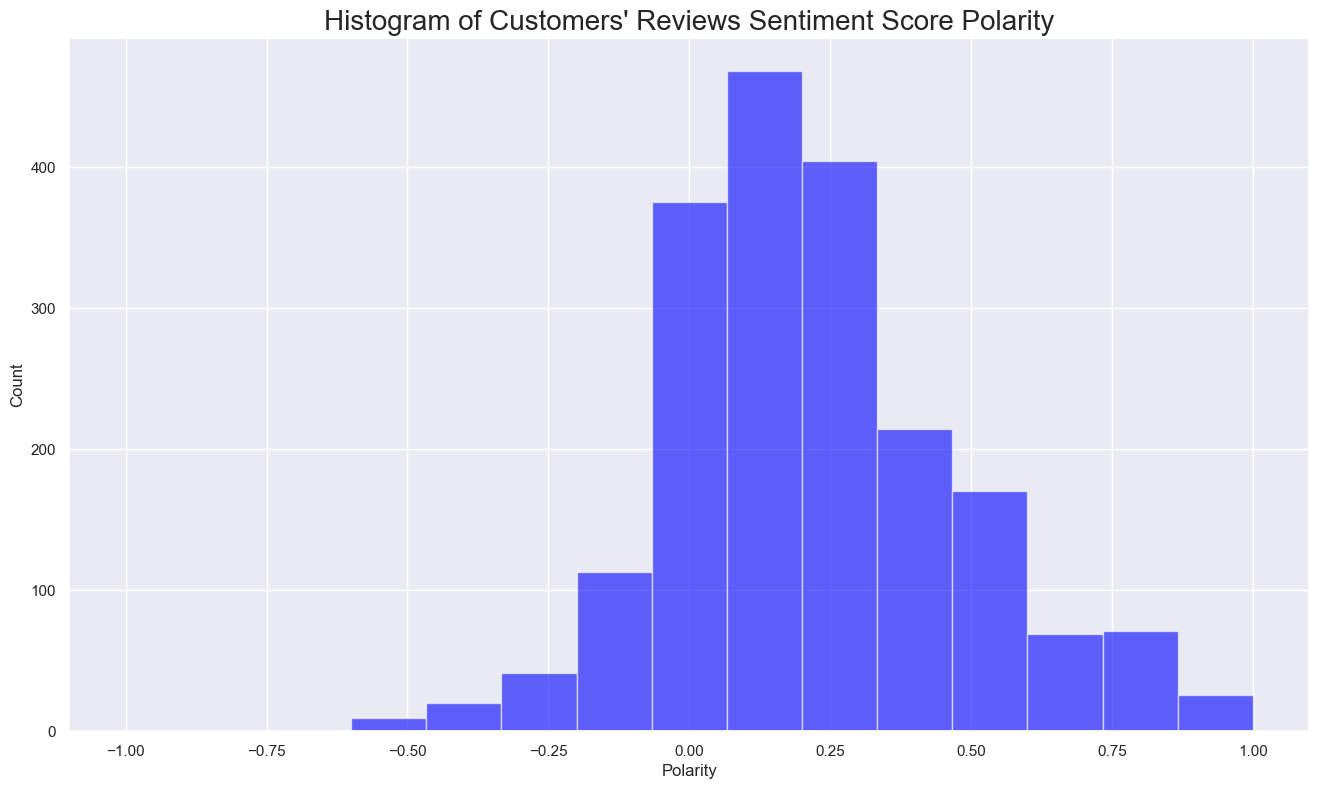

In [826]:
# Visualise customer reviews sentiment polarity scores on histogram.
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['review_polarity'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Customers\' Reviews Sentiment Score Polarity', fontsize=20)

plt.show()

This histogram shows that customers' reviews polarity score sits closest to neutral with a slightly stronger positive than the negative sentiment. Most of the scores are in the range around 0.2 to 0.3, suggesting that the majority of customer reviews are slightly positive. There are a few negative Scores, indicating that negative feedback is less common. The overall distribution leans towards the positive side, which is a good sign for customer satisfaction.

### 4.12.2. Sentiment Polarity of Customer Review Summary Histogram

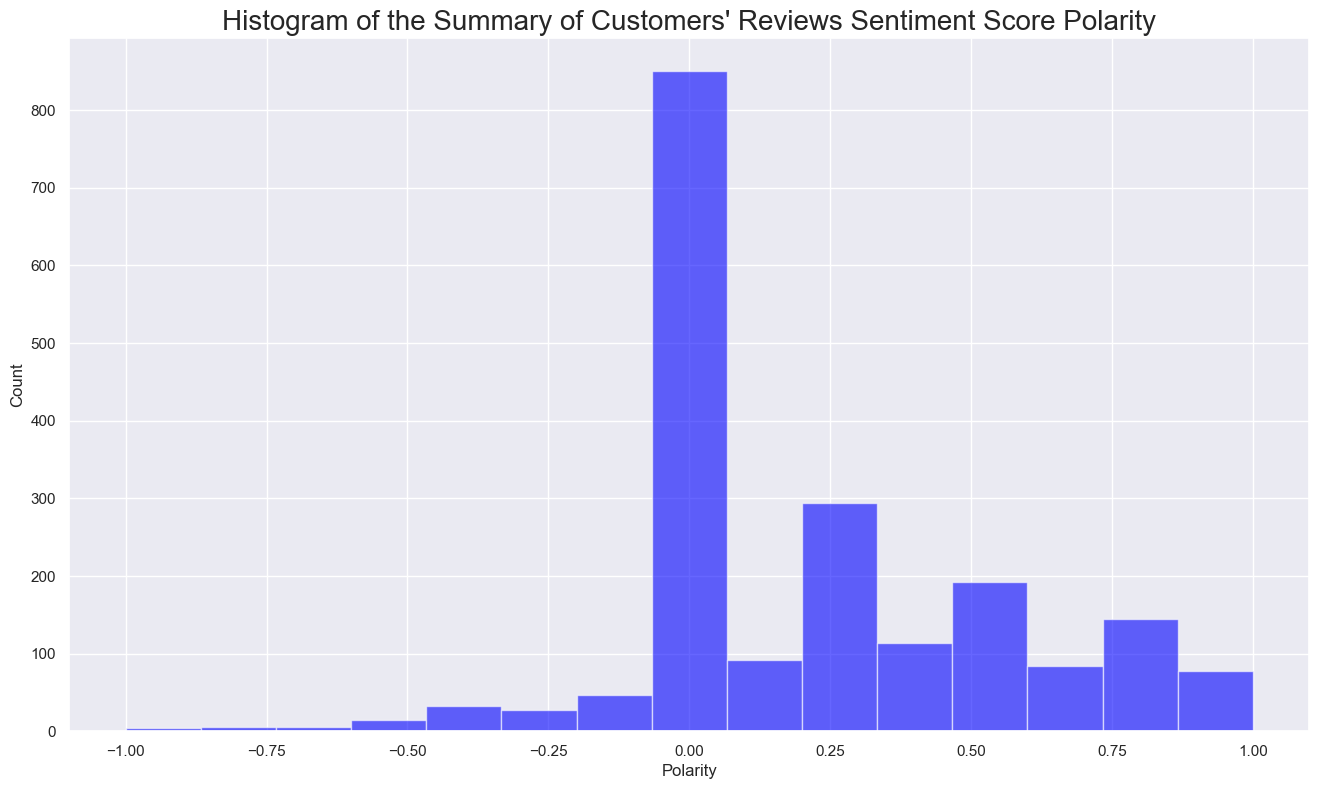

In [832]:
# Visualise customer reviews summary sentiment polarity scores on histogram.
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4['summary_polarity'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of the Summary of Customers\' Reviews Sentiment Score Polarity', fontsize=20)

plt.show()

The majority of the reviews are clustered around the centre, with the highest frequency just above 0. This suggests that most customer reviews have a neutral to slightly positive sentiment. There are fewer reviews with extreme negative or positive sentiment scores, indicating that most customers have moderate opinions. The distribution leans slightly towards the positive side, which is a good indicator of general customer satisfaction.

## 4.13. Identify and print the top 20 positive and negative reviews and summaries
### 4.13.1. Top 20 positive Reviews.

In [839]:
df4.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9\n\nyour unpainted...   
2      2  nice art nice printing  why two panels are fil...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                    tokenised_review  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                   tokenised_summary  review_polarity  \
0  [the, fact, that, 50, of, this, space, is, was...        -0.036111   
1  [another, worthless, dungeon, masters, screen,...         0.035952   
2               [pretty, but, also, pretty, useless]         0.116640   
3                                      [five, stars]         0.578788   
4                                      [money, trap]        -0.316667   

   subjectivity  summary_polarity  
0      0.500000              0.15  
1      0.900000             -0.80  
2      0.733333              0.00  
3      0.000000              0.00  
4      0.000000              0.00

In [842]:
# Identify Top 20 positive Reviews
# Create a DataFrame.
positive_sentiment = df4.nlargest(20, 'review_polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['review', 'review_polarity']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['review'], **{'width': '400px'})

### 4.13.2. Top 20 negative Reviews.

In [847]:
# Create a DataFrame.
negative_sentiment = df4.nsmallest(20, 'review_polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['review','review_polarity']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['review'], **{'width': '1000px'})

### 4.13.3. Top 20 positive summaries

In [852]:
# Identify Top 20 positive Summaries
# Create a DataFrame.
positive_sentiment = df4.nlargest(20, 'summary_polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['summary', 'summary_polarity']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['summary'], **{'width': '400px'})

### 4.13.4. Top 20 negative summaries

In [857]:
# Identify Top 20 positive Summaries
# Create a DataFrame.
positive_sentiment = df4.nsmallest(20, 'summary_polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['summary', 'summary_polarity']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['summary'], **{'width': '400px'})

## Insights & Recommendations:

- The frequency distribution graphs, word clouds and sentiment polarity scores indicate that most customers of Turtle Games have neutral reviews with more customers expressing positive sentiments than the negative sentiments. Neutral reviews may indicate that customers are satisfied but not enthusistic probably because the products meet their expectations but do not exceed them. The presence of positive sentiments mean that most customers are happy and satisfied. And the negative reviews are left by unhappy customers.
- The linear regression models and decision tree regressor models show that salary (income) and spending are the biggest drivers of customer loyalty.
- The cluster analysis segments customers in 5 categories based on their income and spending habits. These are high earners with high spending, high earners with low spending, low earners with low spending, low earners with high spending and medium earners with medium spending.
- To increase customer retention and loyalty, Turtle Games marketing team could use the knowledge gained through predictive analysis to create tailored marketing strategies that appeal to specific groups to encourage repeat purchases and foster long term loyalty. 
- The marketing team could shift the neutral sentiment of the less enthusiastic customers to a positive one by focussing on improving their customer experience and addressing common pain points. They could do this by using surveys to gather information about customers' experience with their products and service. The concern about low qauality data can be addressed by encouraging customers to leave detailed reviews. This can be achieved by asking specific questions during the review process, such as asking for comments on product quality, delivery, and customer service separately.They could then use this knowledge to understand what features click with the customers. This information can be used to improve product quality and customer service and marketing starategies.
